<a href="https://colab.research.google.com/github/ngyoozheng-2025/Organ-C-Codefest-Hackathon/blob/main/Test_OrganC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving Walmart_Sales.csv to Walmart_Sales.csv


{'Walmart_Sales.csv': b'Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment\r\n1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106\r\n1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106\r\n1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106\r\n1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106\r\n1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106\r\n1,12-03-2010,1439541.59,0,57.79,2.667,211.3806429,8.106\r\n1,19-03-2010,1472515.79,0,54.58,2.72,211.215635,8.106\r\n1,26-03-2010,1404429.92,0,51.45,2.732,211.0180424,8.106\r\n1,02-04-2010,1594968.28,0,62.27,2.719,210.8204499,7.808\r\n1,09-04-2010,1545418.53,0,65.86,2.77,210.6228574,7.808\r\n1,16-04-2010,1466058.28,0,66.32,2.808,210.4887,7.808\r\n1,23-04-2010,1391256.12,0,64.84,2.795,210.4391228,7.808\r\n1,30-04-2010,1425100.71,0,67.41,2.78,210.3895456,7.808\r\n1,07-05-2010,1603955.12,0,72.55,2.835,210.3399684,7.808\r\n1,14-05-2010,1494251.5,0,74.78,2.854,210.3374261,7.808\r\n1,21-05-2010,1399662.

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
import ipywidgets as widgets
from IPython.display import display, clear_output
import logging
from datetime import datetime, timedelta
import warnings
from calendar import monthrange
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import shap
import os

In [ ]:
# Install necessary libraries
!pip install prophet scikit-learn pandas numpy matplotlib joblib

In [ ]:
df = pd.read_csv("Walmart_Sales.csv", parse_dates=['Date'], dayfirst=True)

# Drop unnamed index column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print("Data shape:", df.shape)
print(df.columns)
df.head()

Data shape: (6435, 8)
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

/tmp/ipython-input-3515577962.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


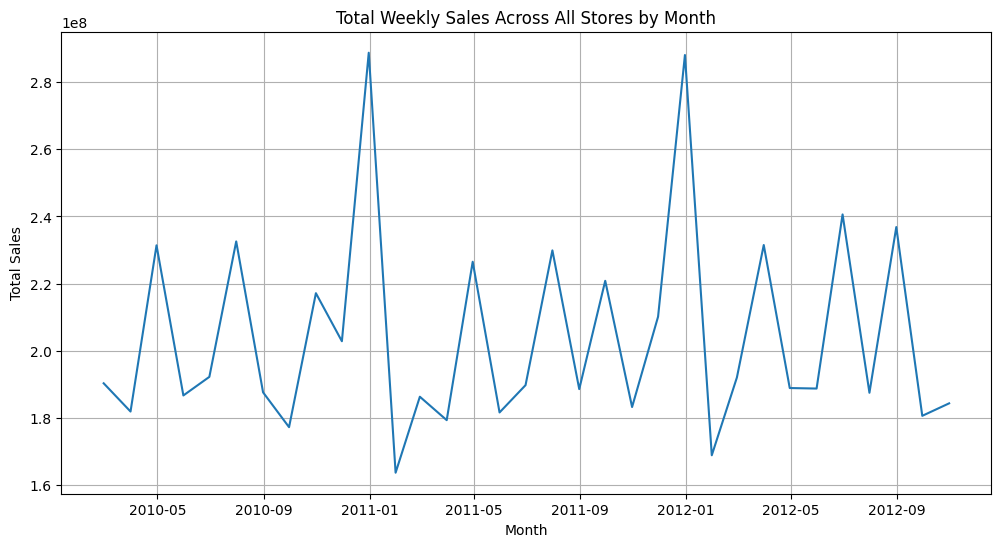

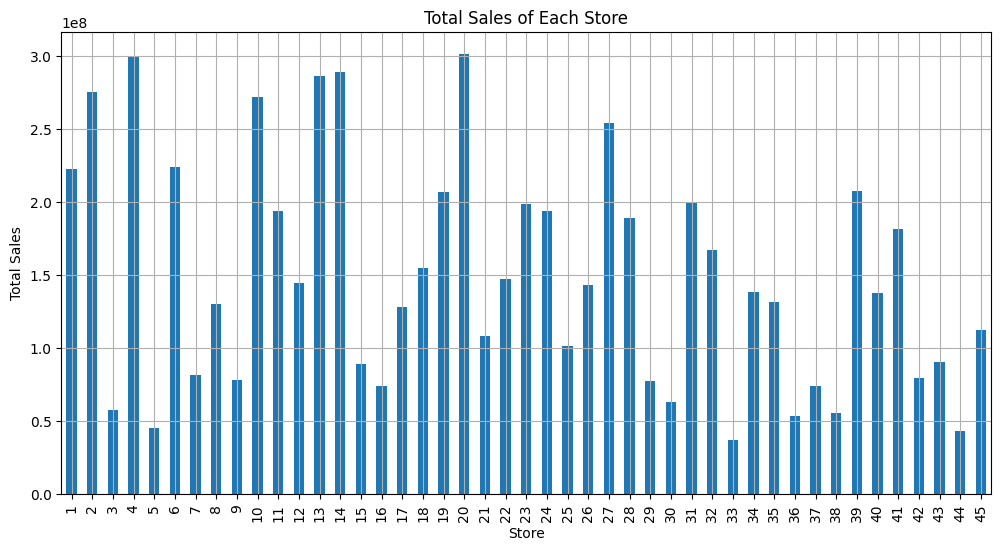

/tmp/ipython-input-3515577962.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()


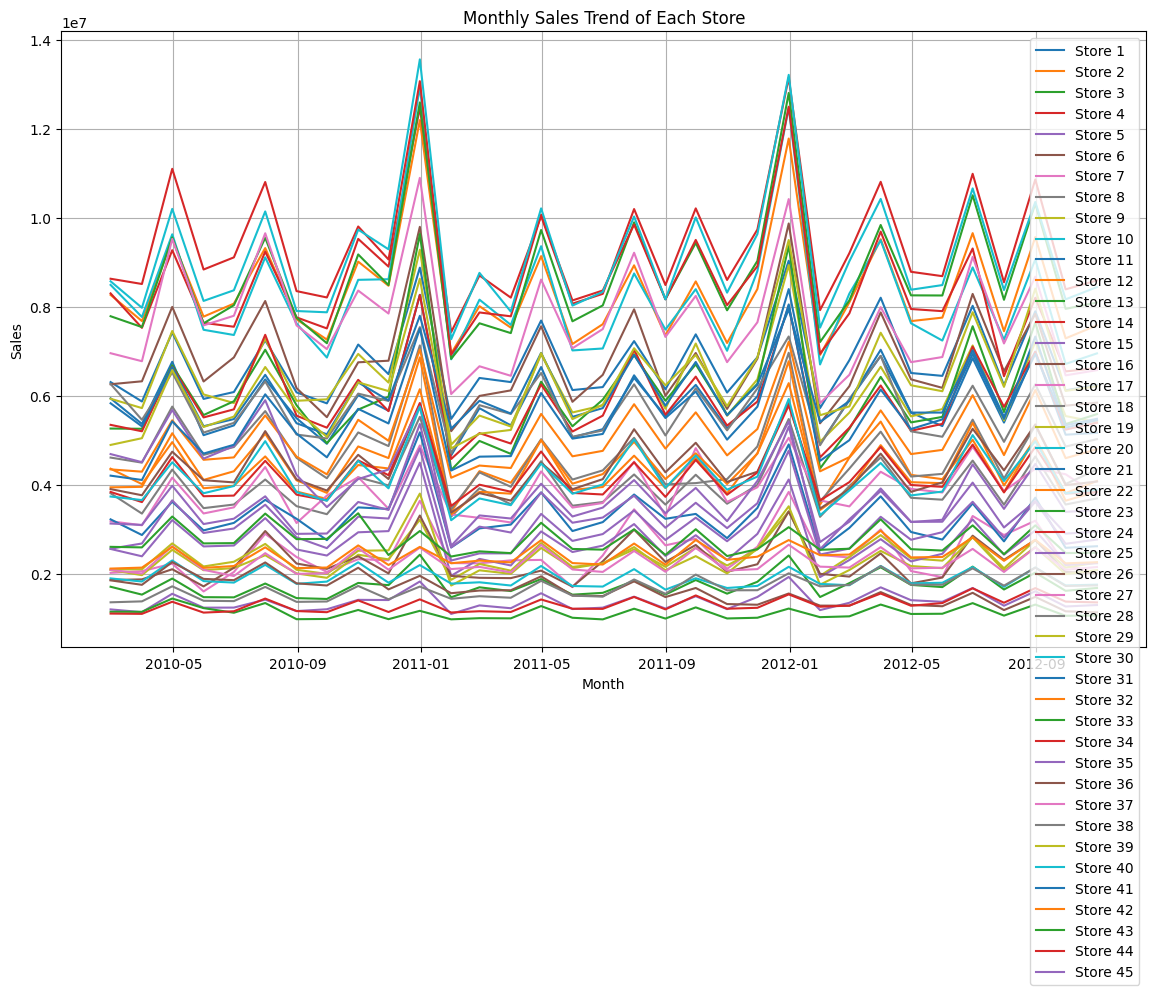

/tmp/ipython-input-3515577962.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_feat = df.groupby(pd.Grouper(key='Date', freq='M'))[col].mean()
/tmp/ipython-input-3515577962.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].mean()


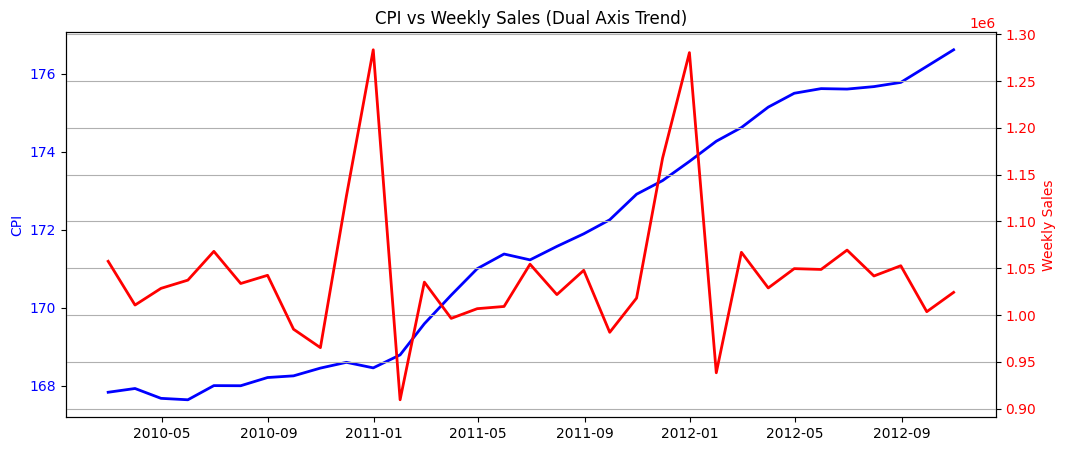

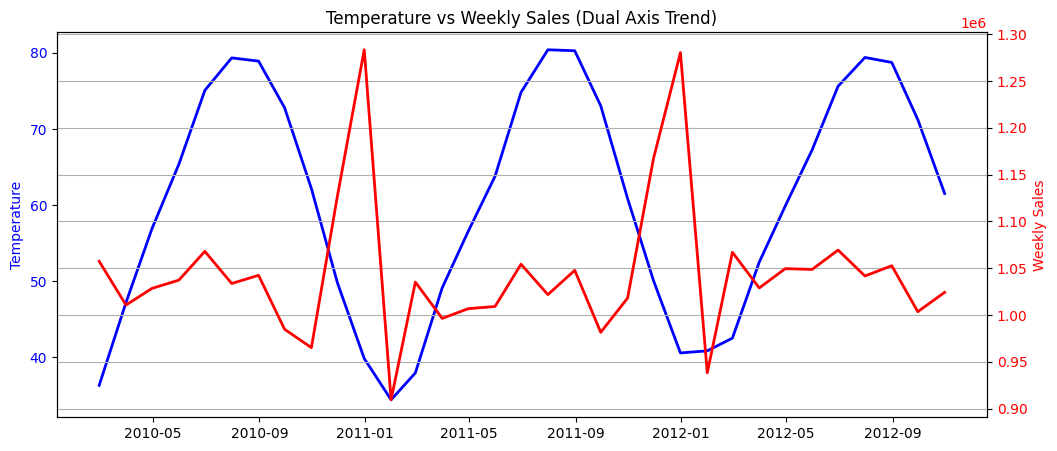

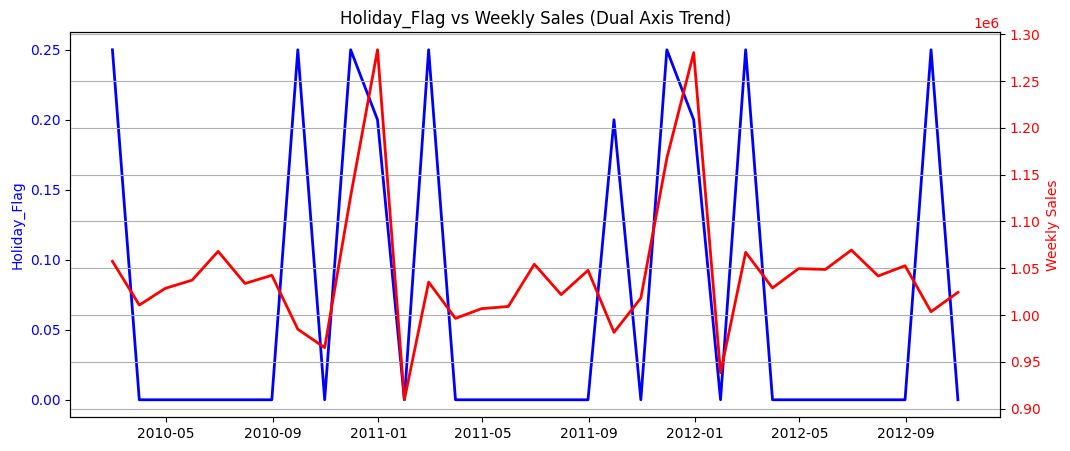

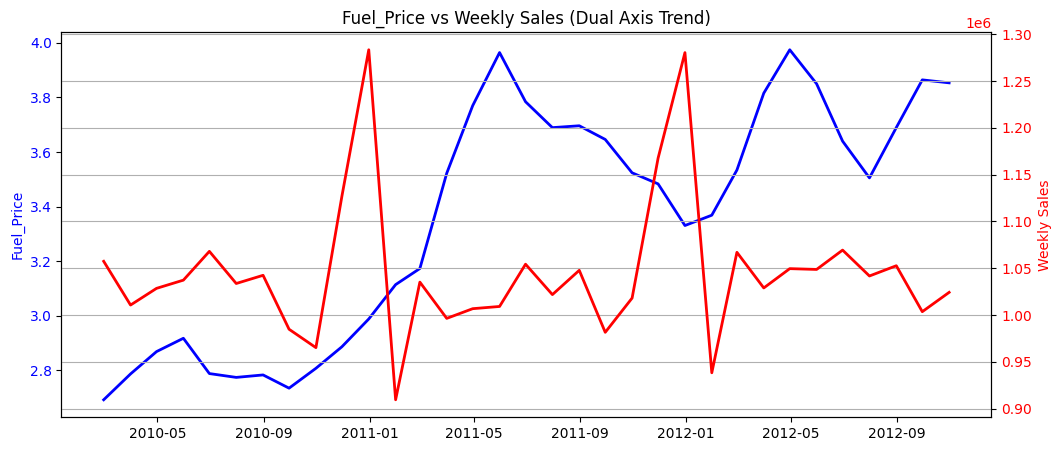

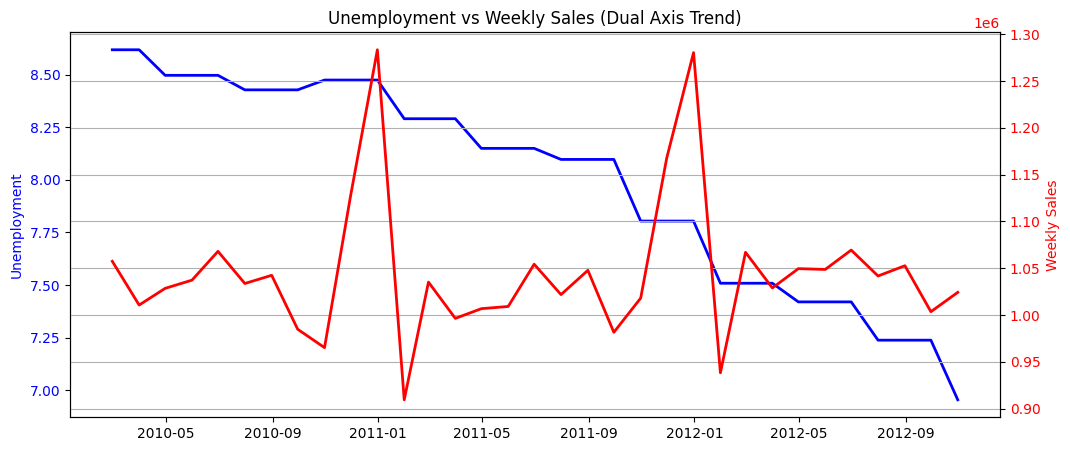


========== STORE 1 BACKTEST ==========
MAE  = 116746.26
RMSE = 132478.38
MAPE = 7.68%



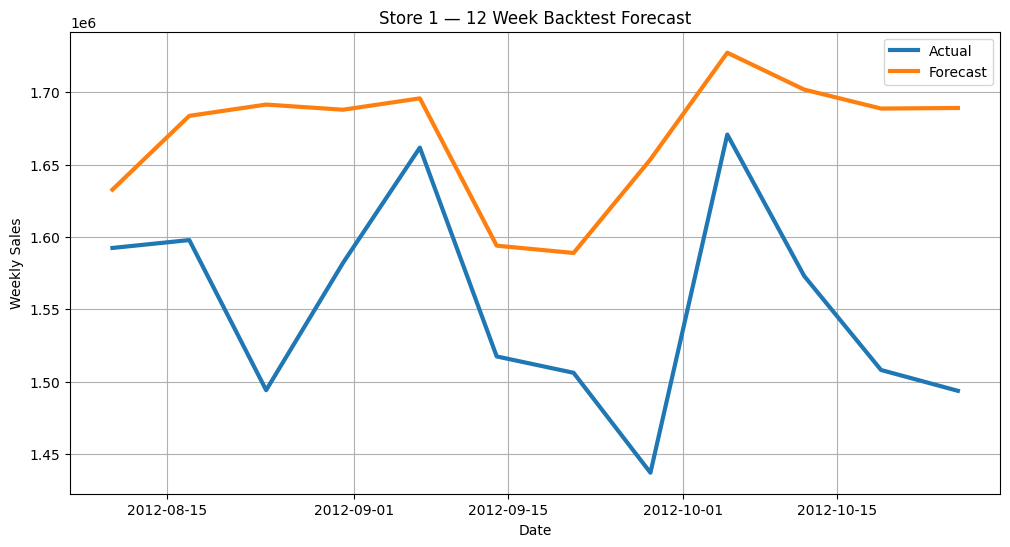


========== STORE 2 BACKTEST ==========
MAE  = 104975.53
RMSE = 119579.93
MAPE = 5.63%



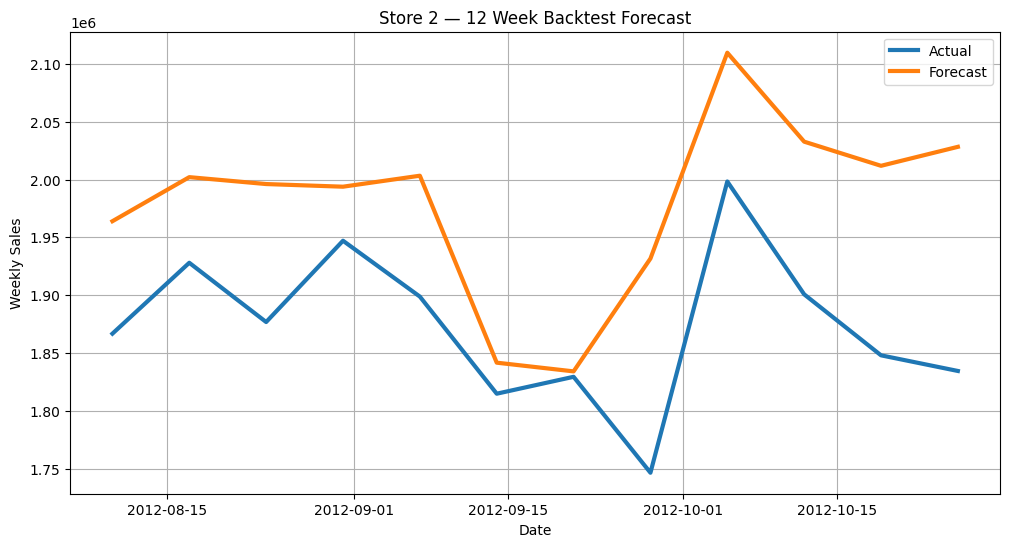


========== STORE 3 BACKTEST ==========
MAE  = 49676.52
RMSE = 51978.36
MAPE = 12.20%



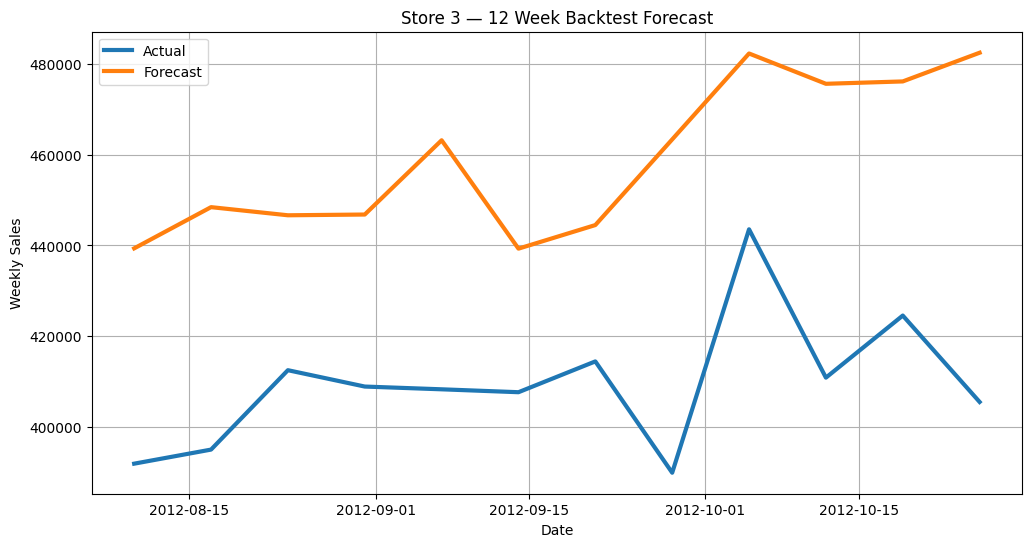


========== STORE 4 BACKTEST ==========
MAE  = 88187.69
RMSE = 104094.41
MAPE = 4.18%



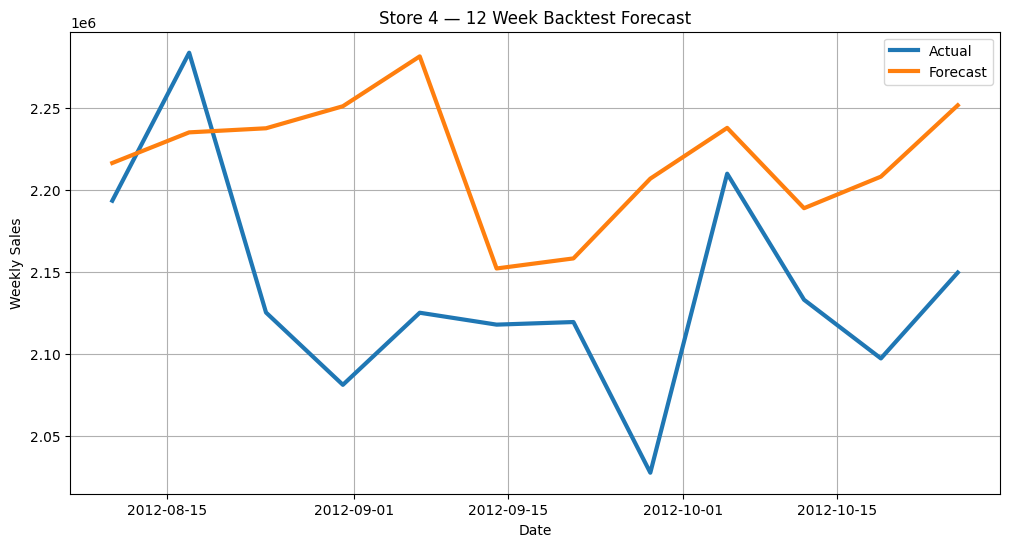


========== STORE 5 BACKTEST ==========
MAE  = 17381.70
RMSE = 20402.34
MAPE = 5.48%



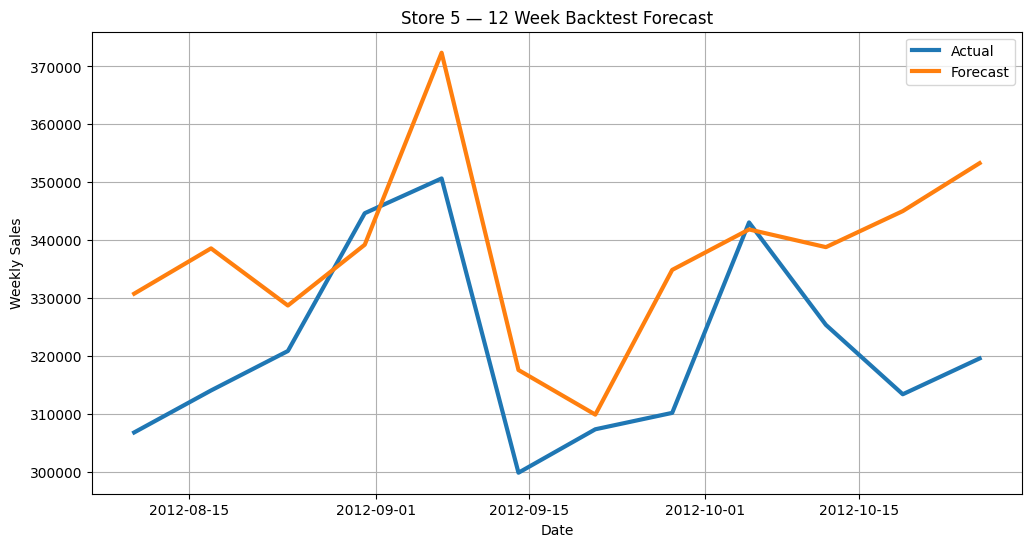


========== STORE 6 BACKTEST ==========
MAE  = 66769.86
RMSE = 82075.33
MAPE = 4.61%



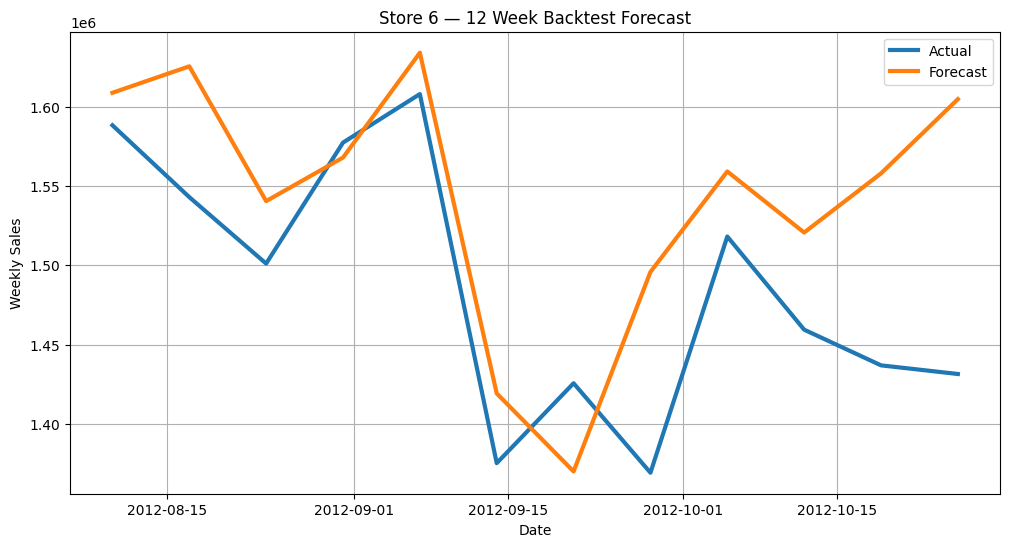


========== STORE 7 BACKTEST ==========
MAE  = 59617.60
RMSE = 62638.82
MAPE = 10.94%



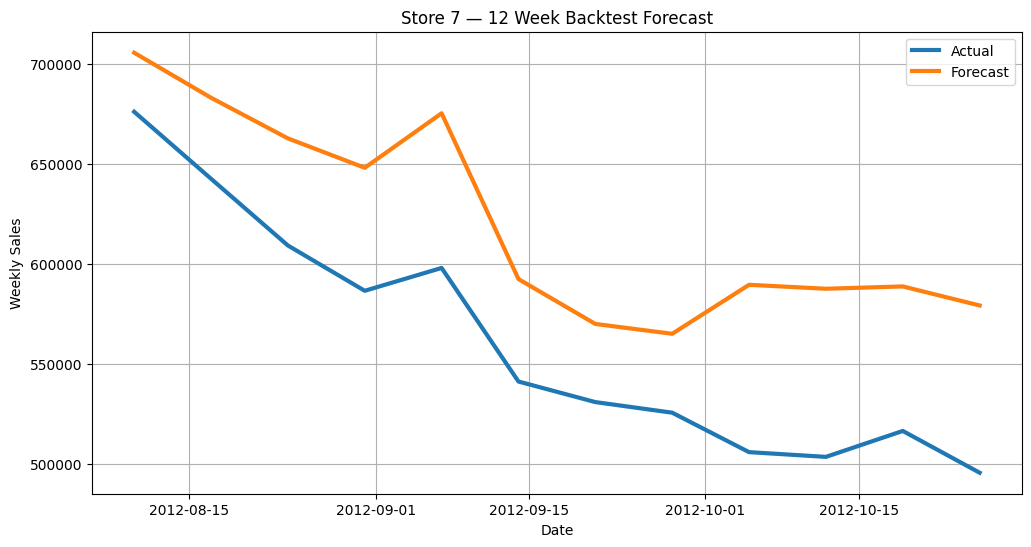


========== STORE 8 BACKTEST ==========
MAE  = 47154.94
RMSE = 55766.07
MAPE = 5.22%



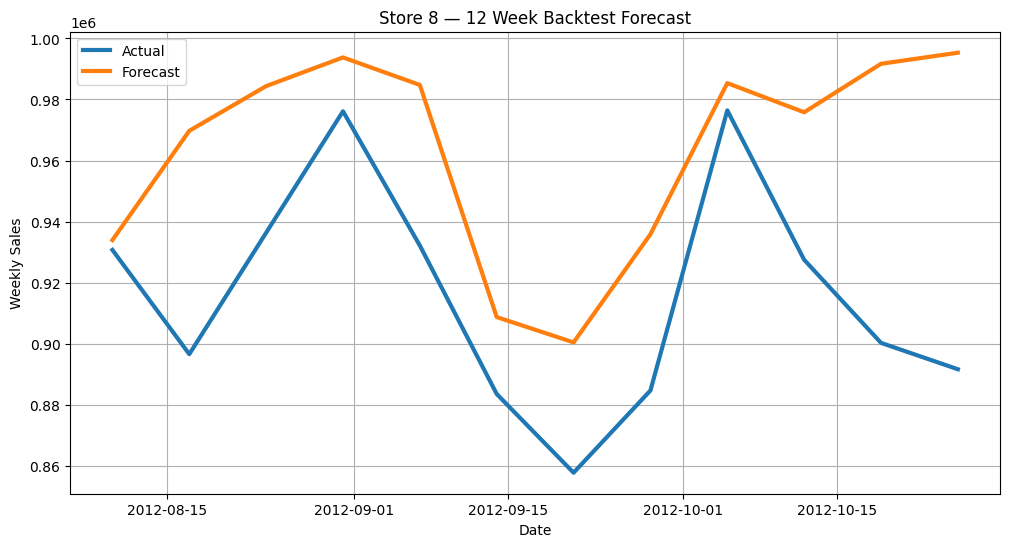


========== STORE 9 BACKTEST ==========
MAE  = 20372.47
RMSE = 24670.21
MAPE = 3.74%



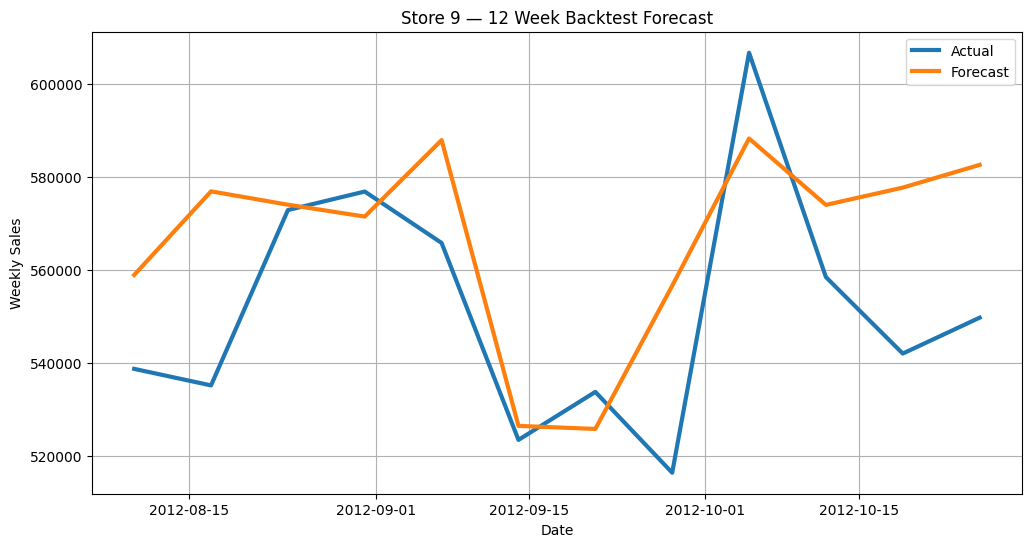


========== STORE 10 BACKTEST ==========
MAE  = 137203.81
RMSE = 153762.68
MAPE = 7.92%



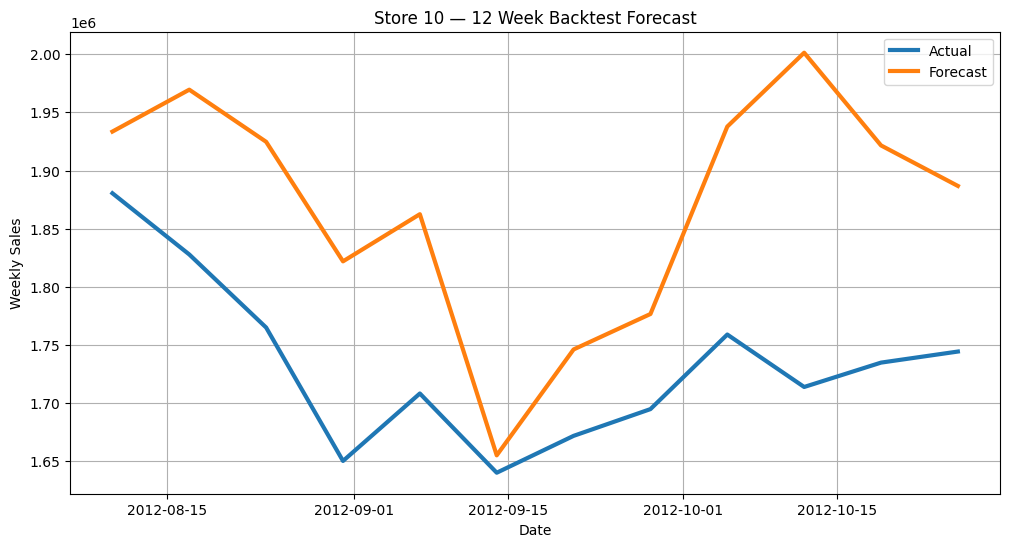


========== STORE 11 BACKTEST ==========
MAE  = 122537.70
RMSE = 142306.37
MAPE = 9.51%



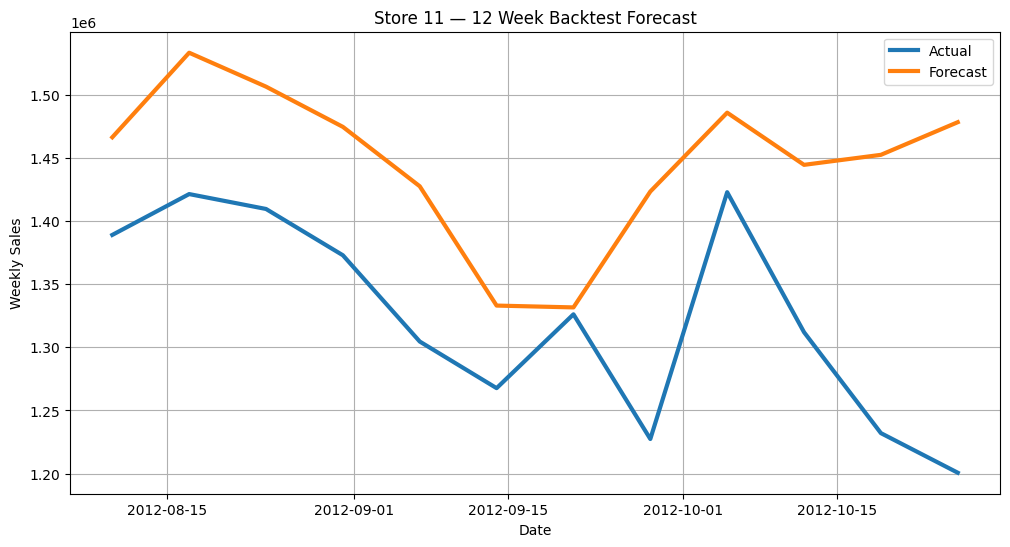


========== STORE 12 BACKTEST ==========
MAE  = 25243.44
RMSE = 38458.85
MAPE = 2.65%



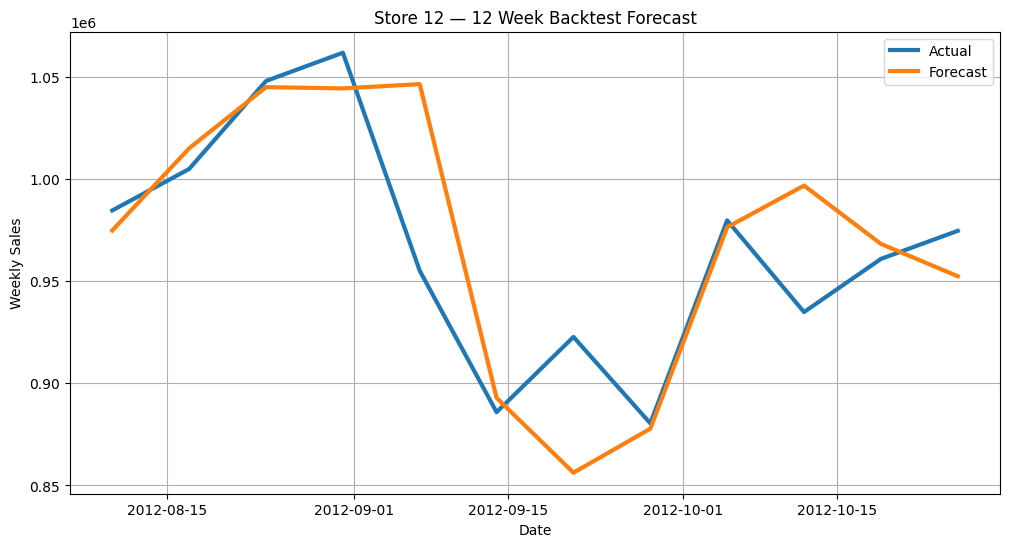


========== STORE 13 BACKTEST ==========
MAE  = 52941.35
RMSE = 73842.29
MAPE = 2.58%



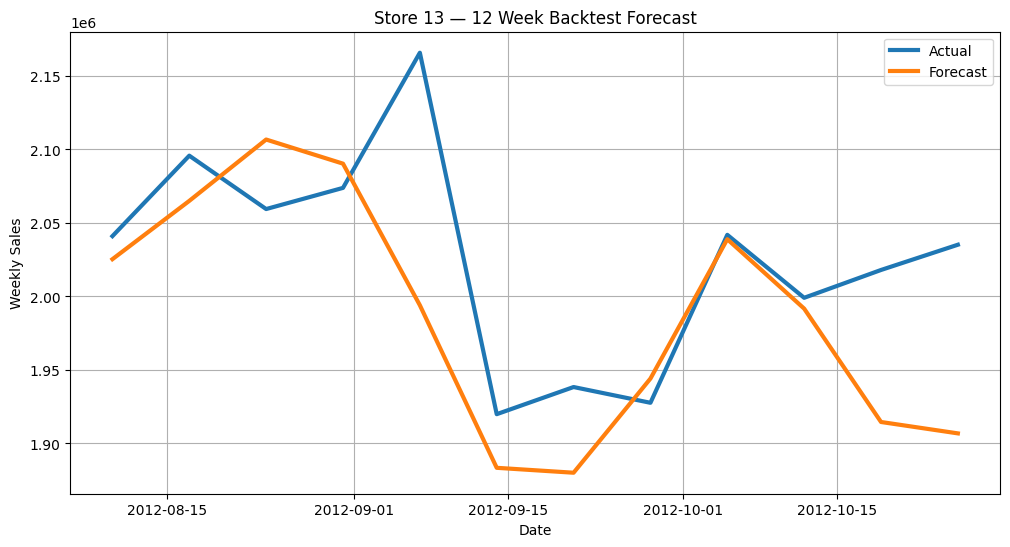


========== STORE 14 BACKTEST ==========
MAE  = 86674.70
RMSE = 106660.97
MAPE = 5.30%



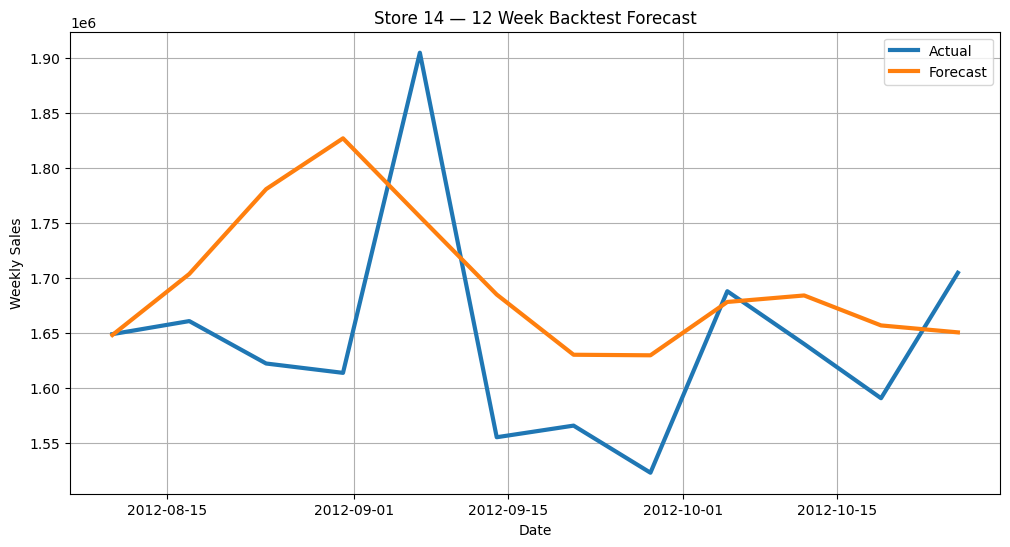


========== STORE 15 BACKTEST ==========
MAE  = 18930.32
RMSE = 25774.90
MAPE = 3.31%



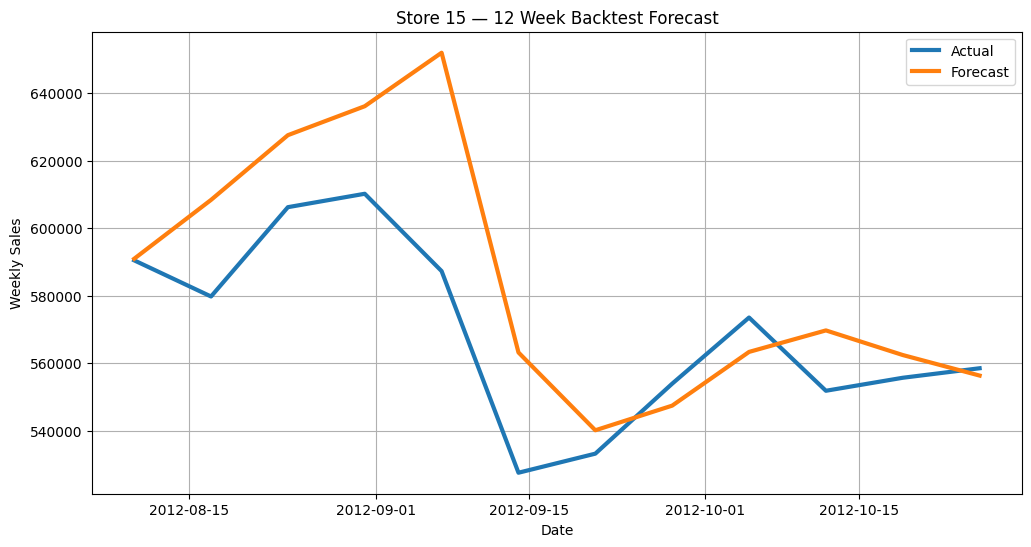


========== STORE 16 BACKTEST ==========
MAE  = 18541.21
RMSE = 26912.94
MAPE = 3.49%



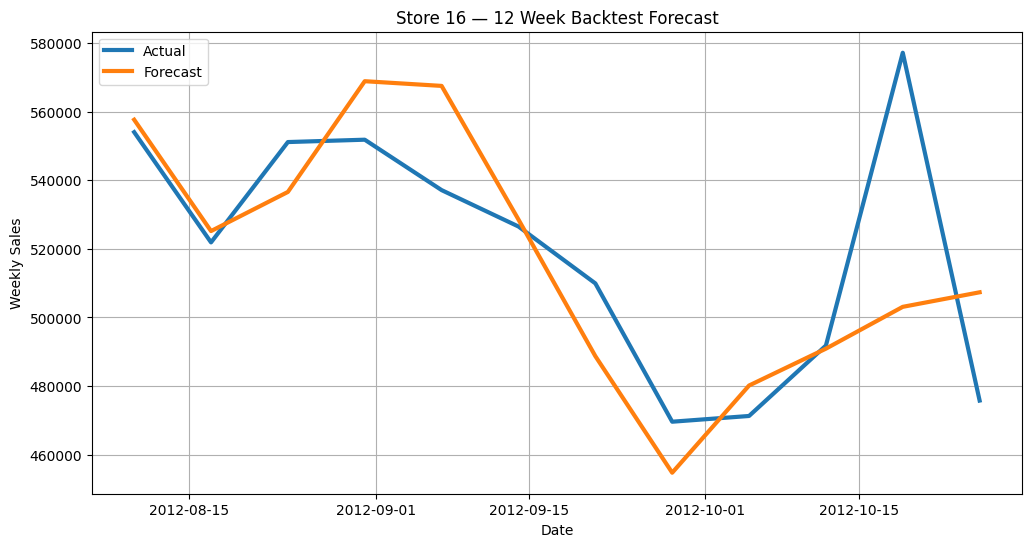


========== STORE 17 BACKTEST ==========
MAE  = 71840.09
RMSE = 87951.44
MAPE = 7.38%



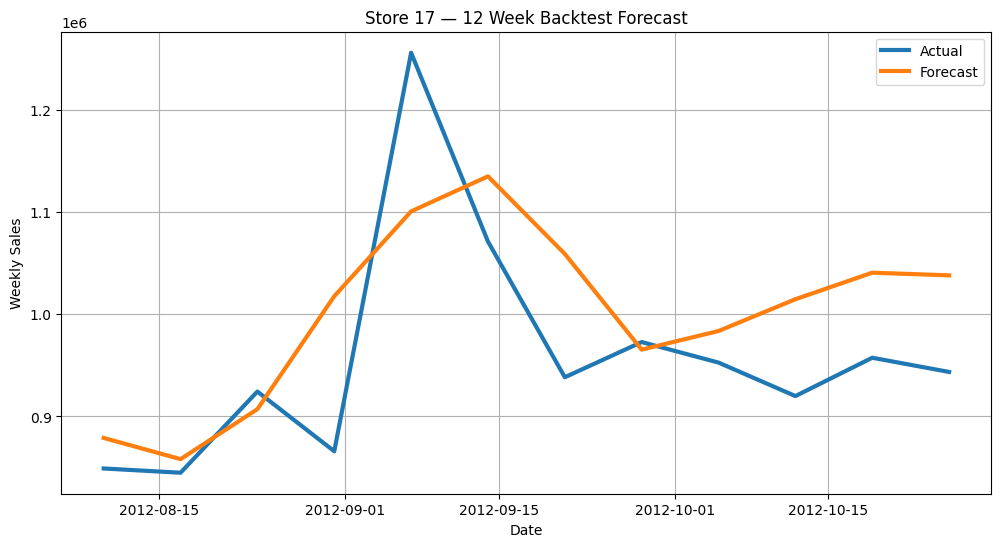


========== STORE 18 BACKTEST ==========
MAE  = 99944.34
RMSE = 107693.01
MAPE = 9.51%



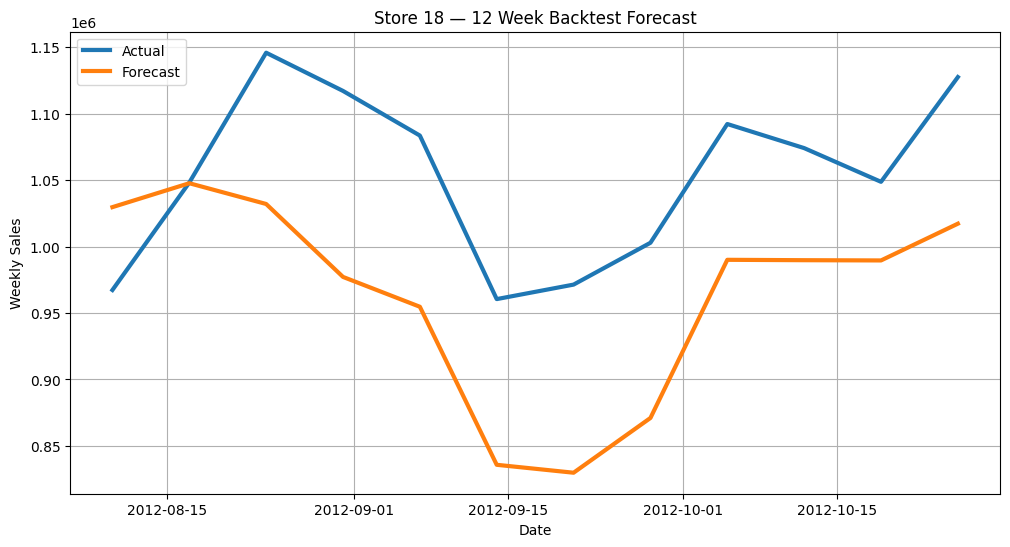


========== STORE 19 BACKTEST ==========
MAE  = 34168.97
RMSE = 43911.32
MAPE = 2.43%



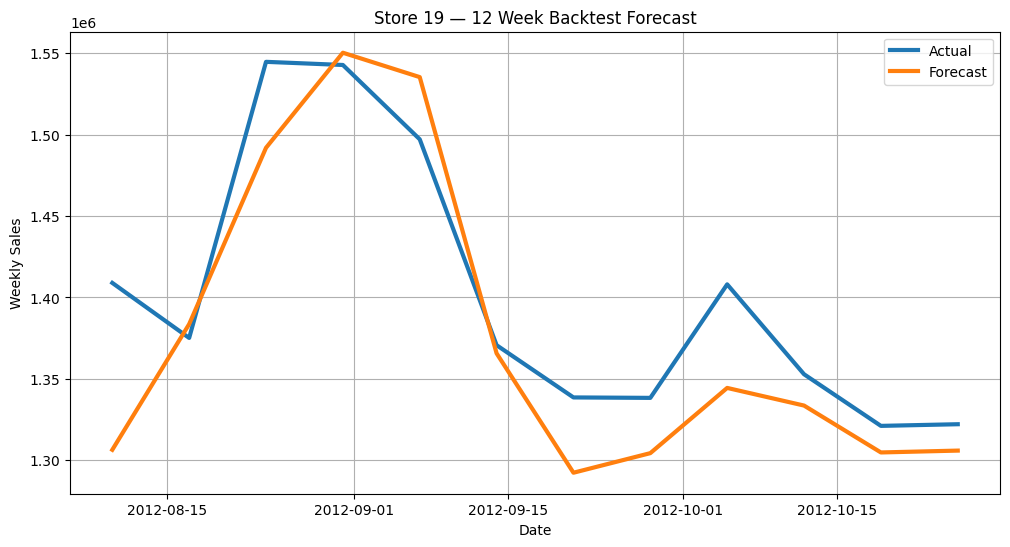


========== STORE 20 BACKTEST ==========
MAE  = 68166.21
RMSE = 84702.53
MAPE = 3.28%



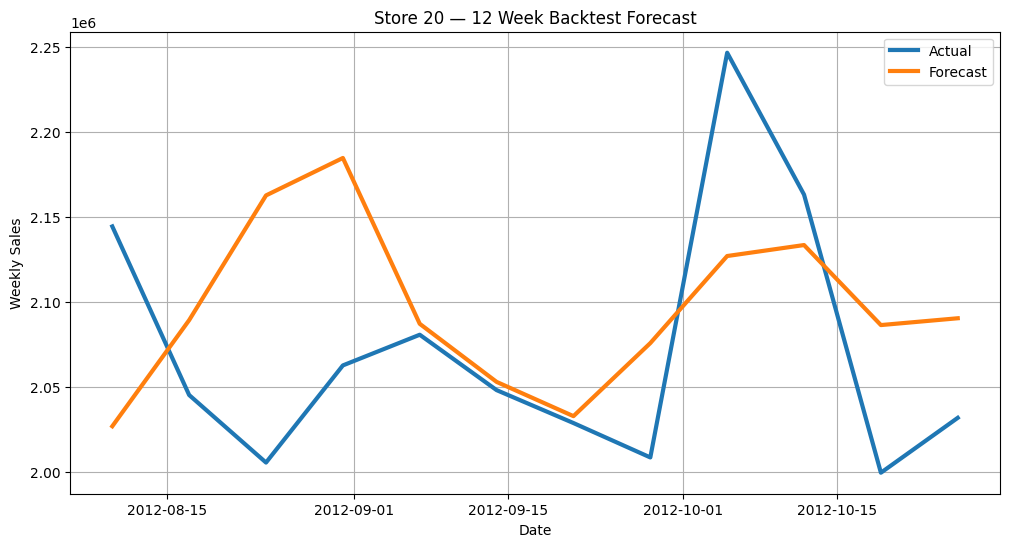


========== STORE 21 BACKTEST ==========
MAE  = 54361.59
RMSE = 63746.70
MAPE = 8.13%



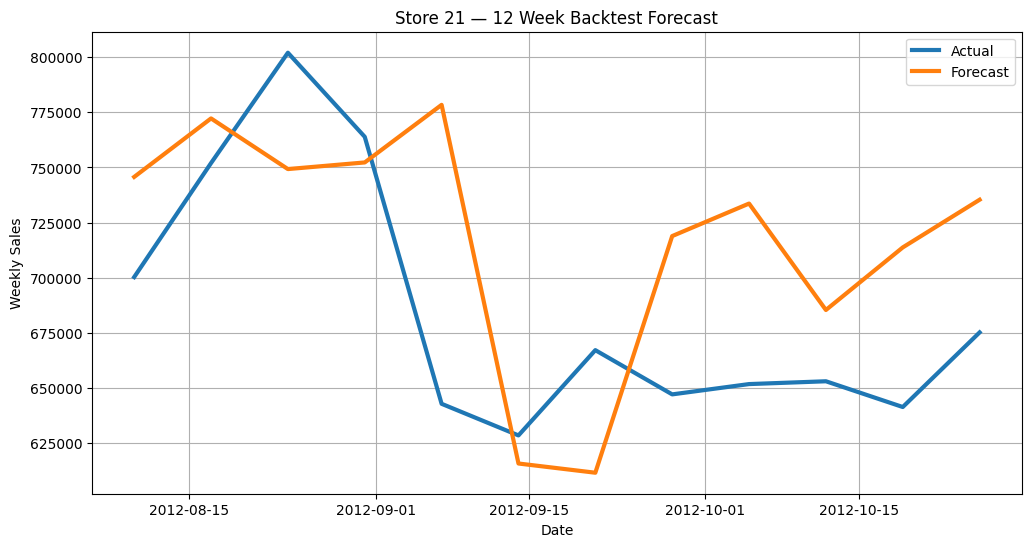


========== STORE 22 BACKTEST ==========
MAE  = 37693.14
RMSE = 43006.20
MAPE = 3.77%



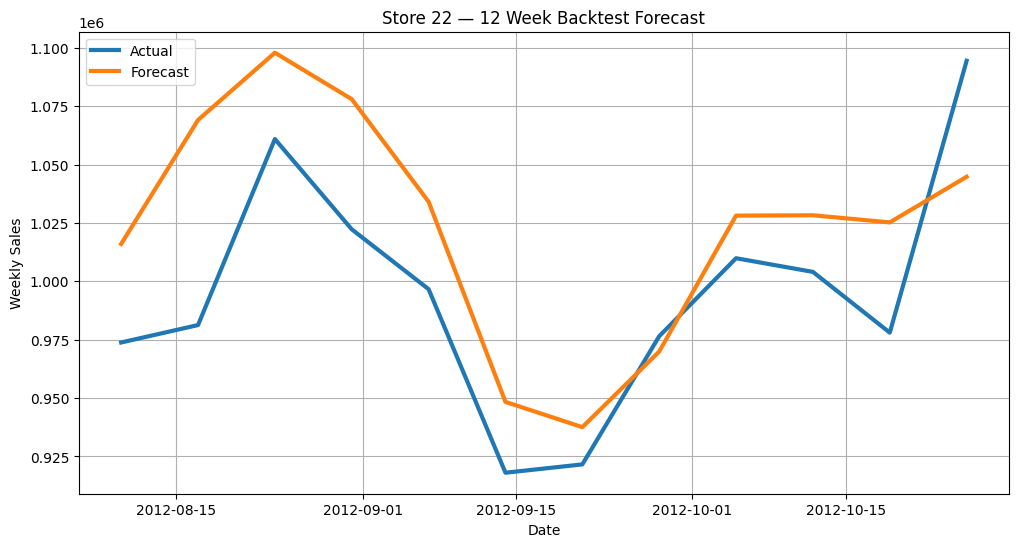


========== STORE 23 BACKTEST ==========
MAE  = 61621.65
RMSE = 75147.96
MAPE = 4.42%



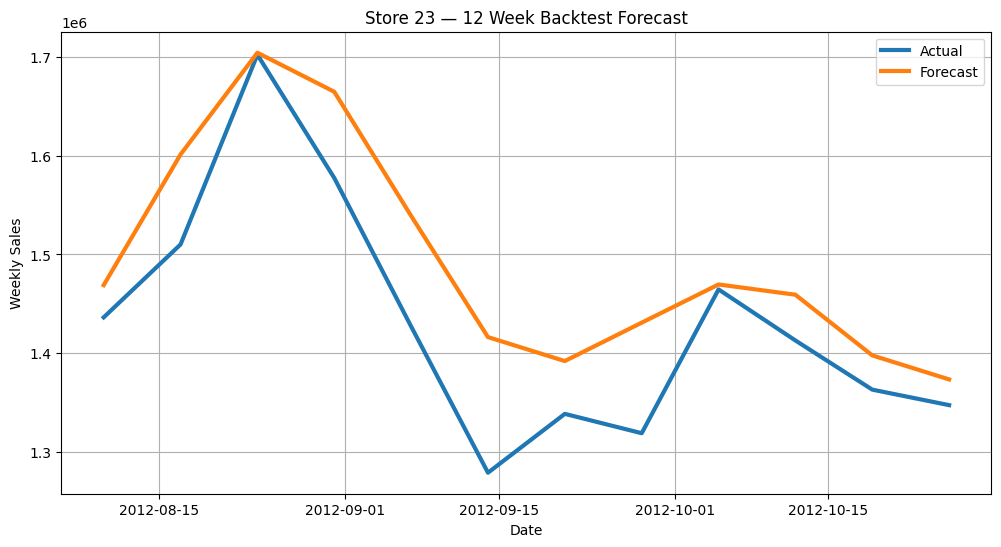


========== STORE 24 BACKTEST ==========
MAE  = 55877.80
RMSE = 70793.53
MAPE = 4.03%



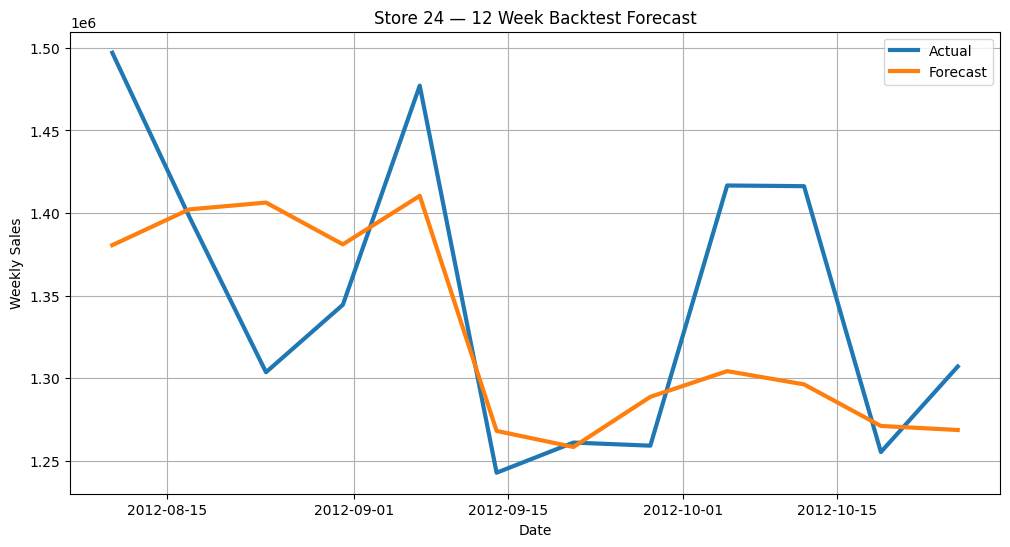


========== STORE 25 BACKTEST ==========
MAE  = 20567.49
RMSE = 23366.32
MAPE = 2.97%



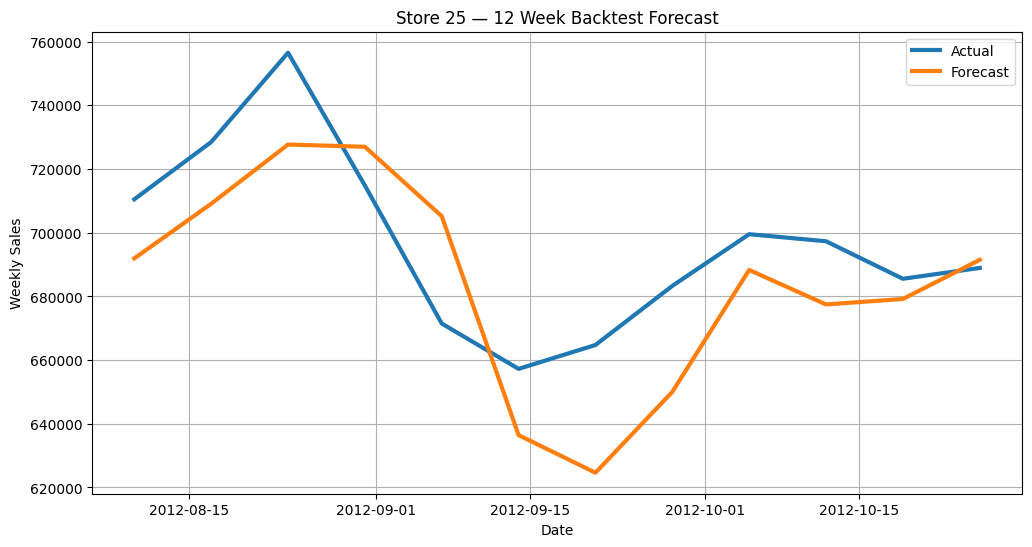


========== STORE 26 BACKTEST ==========
MAE  = 20975.72
RMSE = 28313.66
MAPE = 2.01%



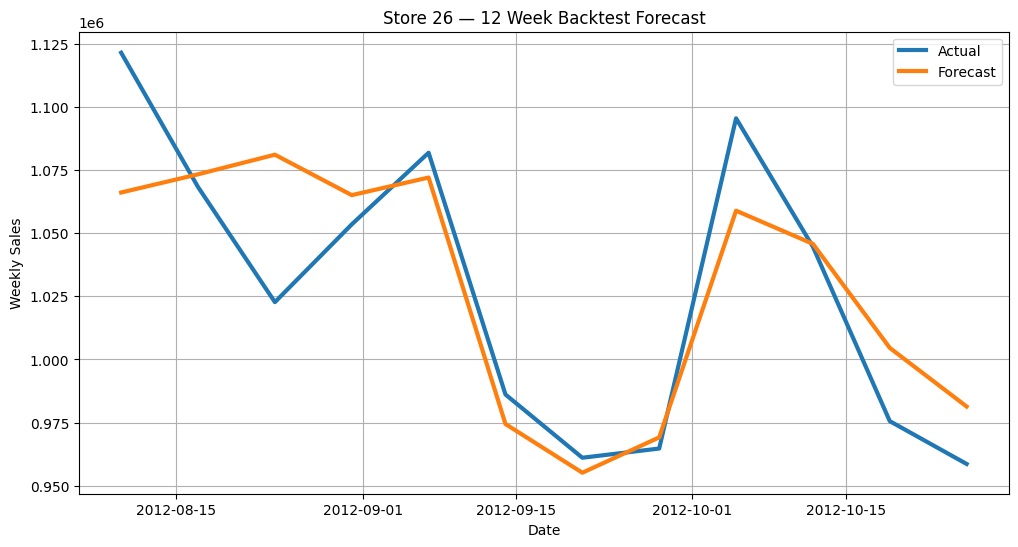


========== STORE 27 BACKTEST ==========
MAE  = 44206.54
RMSE = 51022.37
MAPE = 2.62%



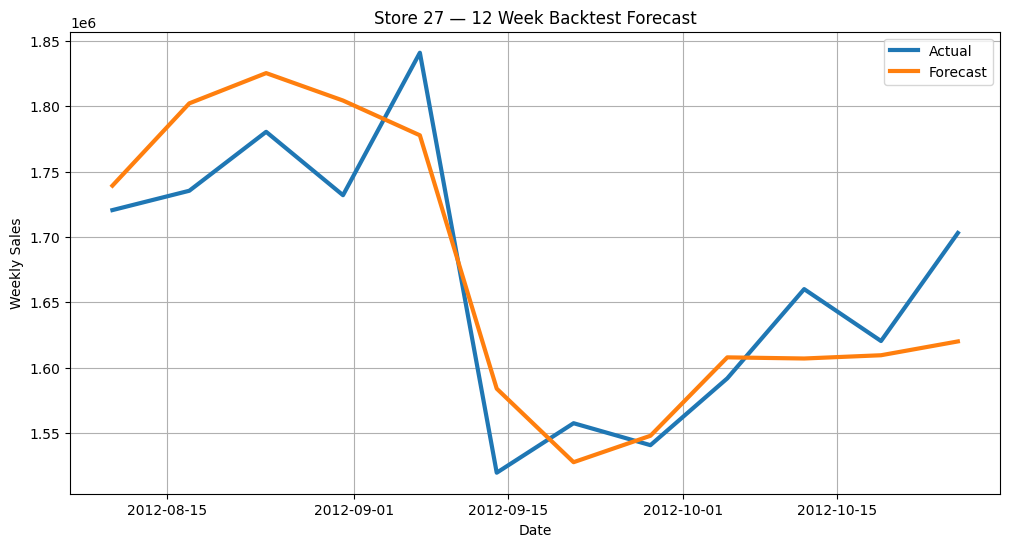


========== STORE 28 BACKTEST ==========
MAE  = 142128.85
RMSE = 179223.99
MAPE = 11.84%



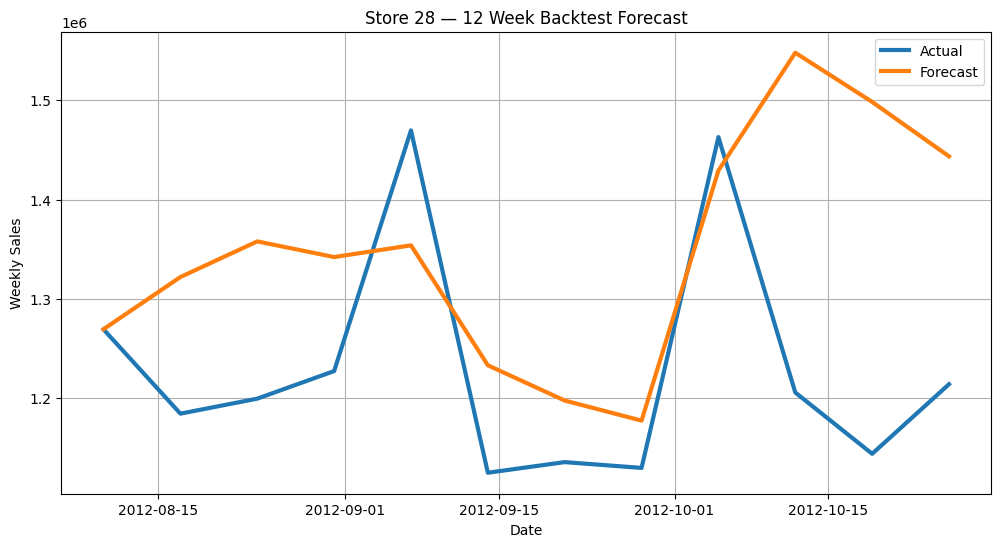


========== STORE 29 BACKTEST ==========
MAE  = 28445.56
RMSE = 43687.81
MAPE = 5.90%



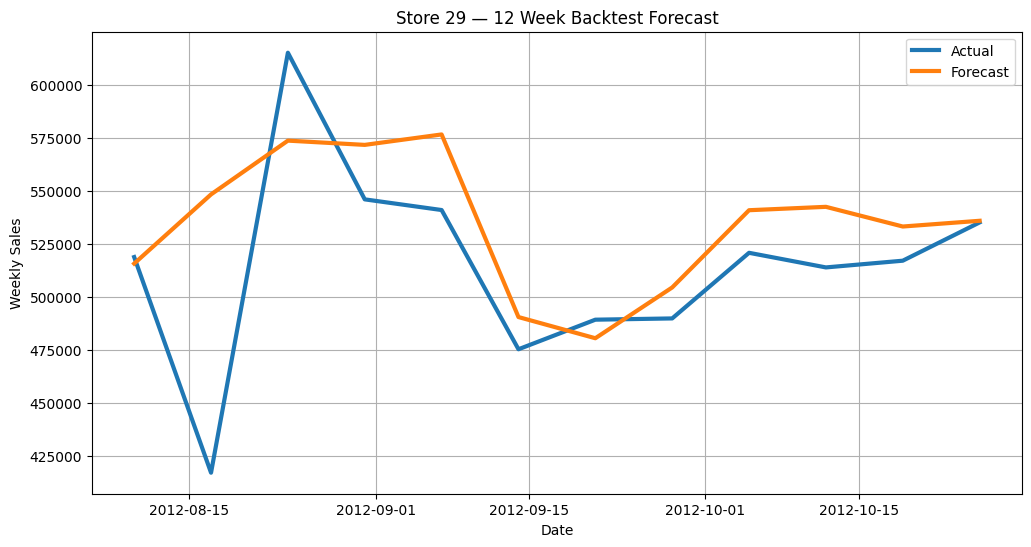


========== STORE 30 BACKTEST ==========
MAE  = 13034.53
RMSE = 16514.58
MAPE = 2.99%



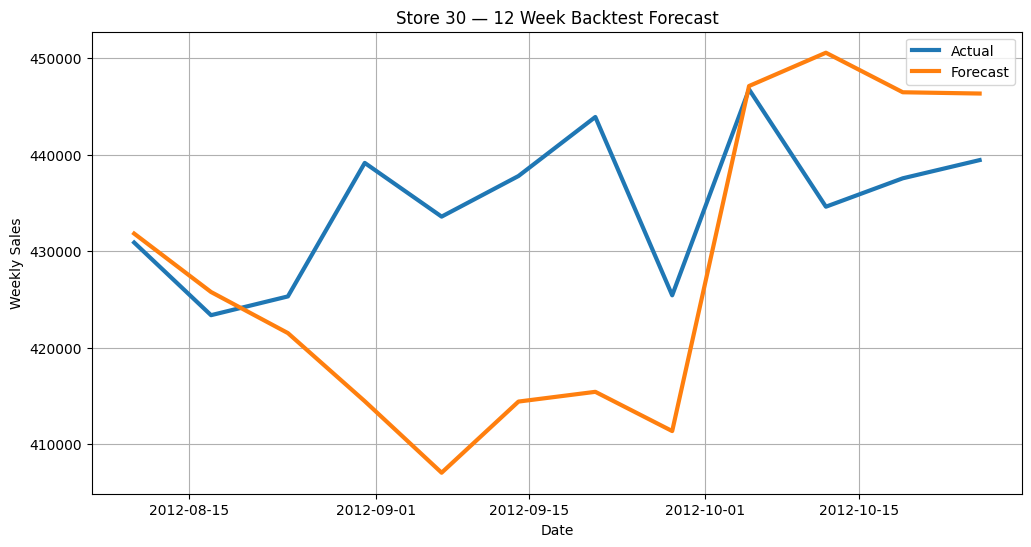


========== STORE 31 BACKTEST ==========
MAE  = 91121.54
RMSE = 102440.81
MAPE = 6.72%



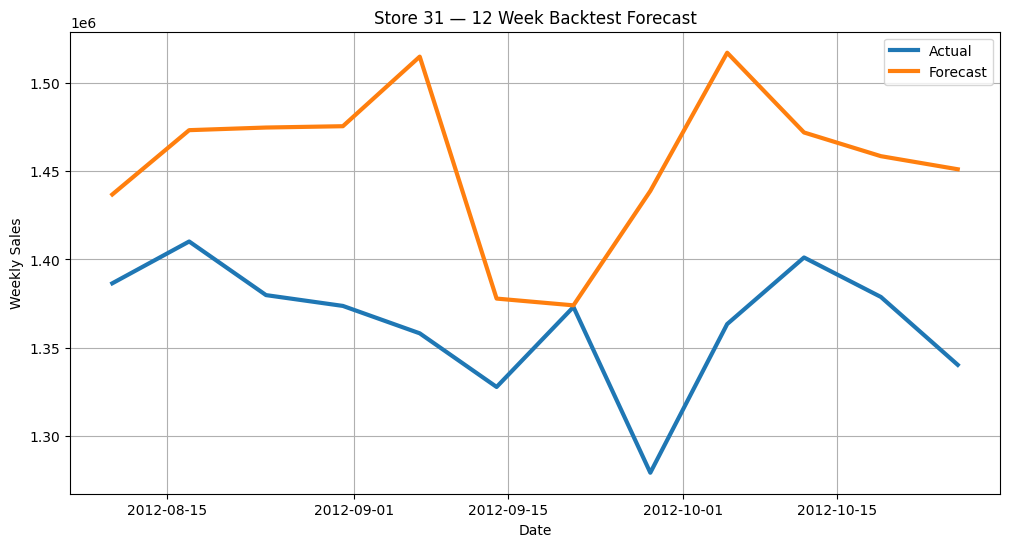


========== STORE 32 BACKTEST ==========
MAE  = 32223.63
RMSE = 37053.12
MAPE = 2.69%



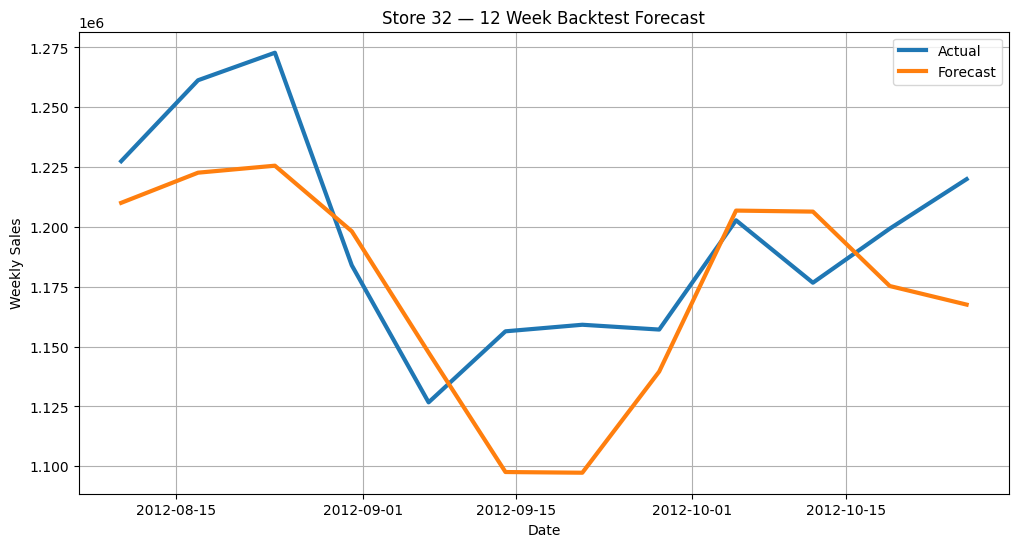


========== STORE 33 BACKTEST ==========
MAE  = 14551.21
RMSE = 18618.75
MAPE = 5.39%



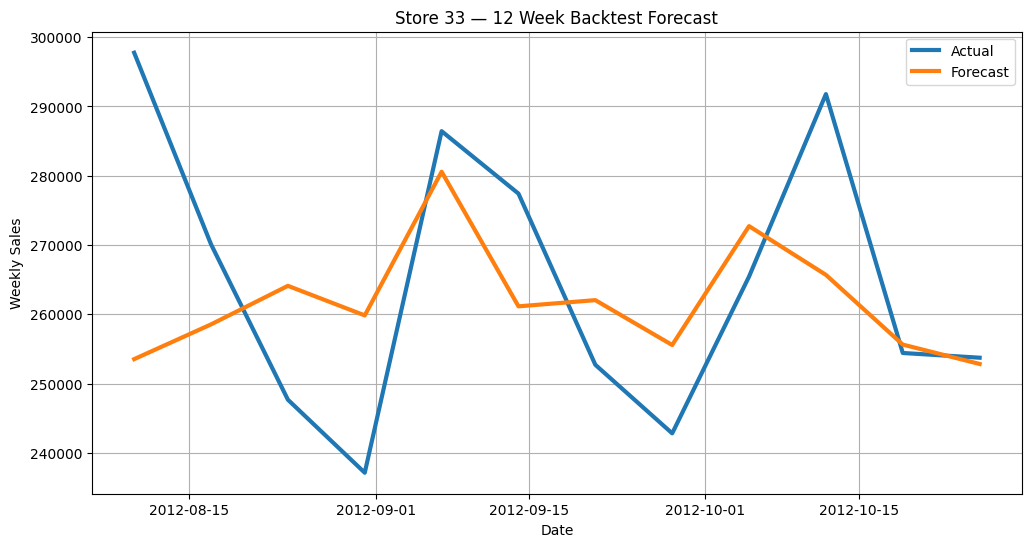


========== STORE 34 BACKTEST ==========
MAE  = 25633.93
RMSE = 29293.41
MAPE = 2.67%



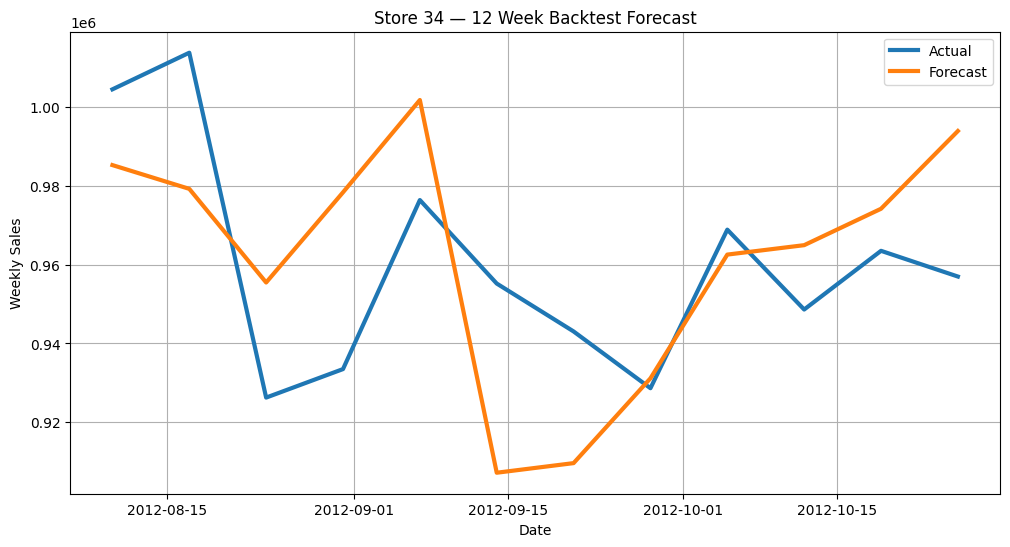


========== STORE 35 BACKTEST ==========
MAE  = 147504.78
RMSE = 151594.35
MAPE = 17.14%



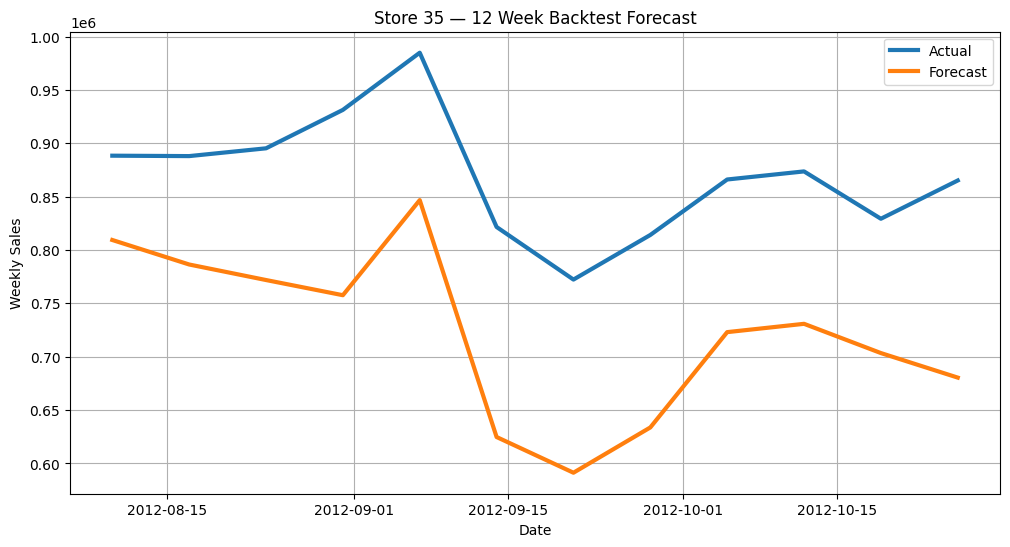


========== STORE 36 BACKTEST ==========
MAE  = 13936.38
RMSE = 16076.40
MAPE = 4.76%



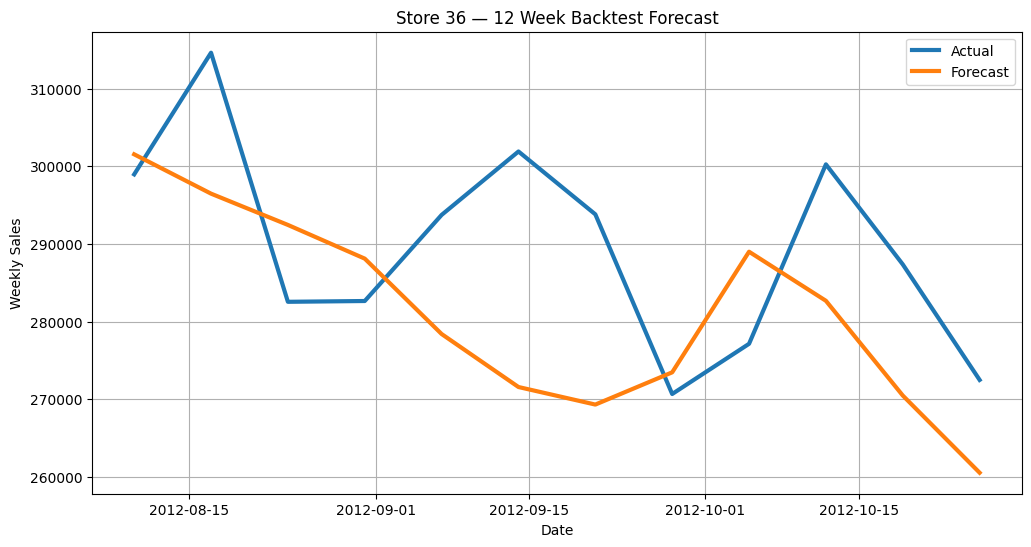


========== STORE 37 BACKTEST ==========
MAE  = 11343.66
RMSE = 14175.69
MAPE = 2.13%



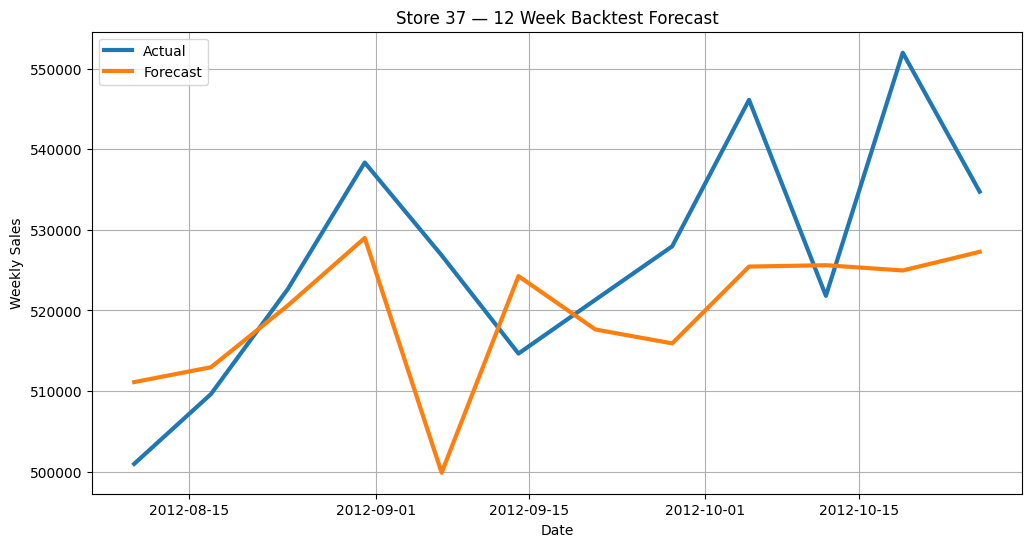


========== STORE 38 BACKTEST ==========
MAE  = 43422.98
RMSE = 48335.47
MAPE = 10.18%



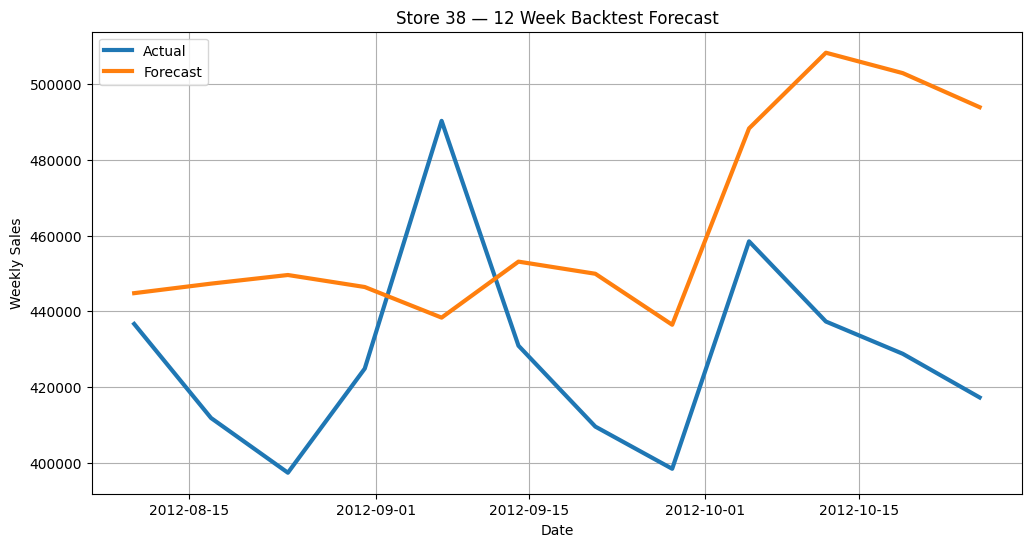


========== STORE 39 BACKTEST ==========
MAE  = 55449.72
RMSE = 69499.35
MAPE = 3.56%



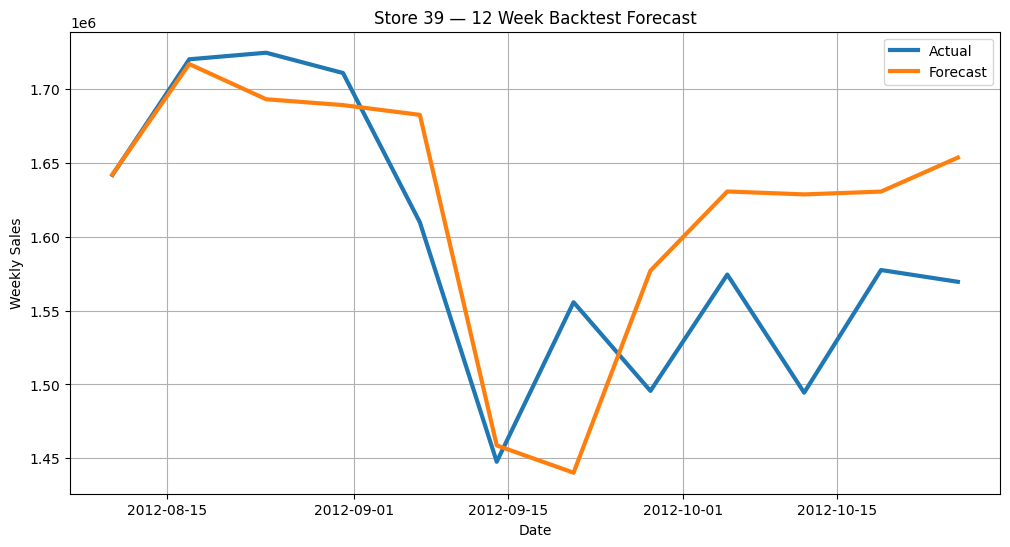


========== STORE 40 BACKTEST ==========
MAE  = 62726.71
RMSE = 67377.04
MAPE = 6.56%



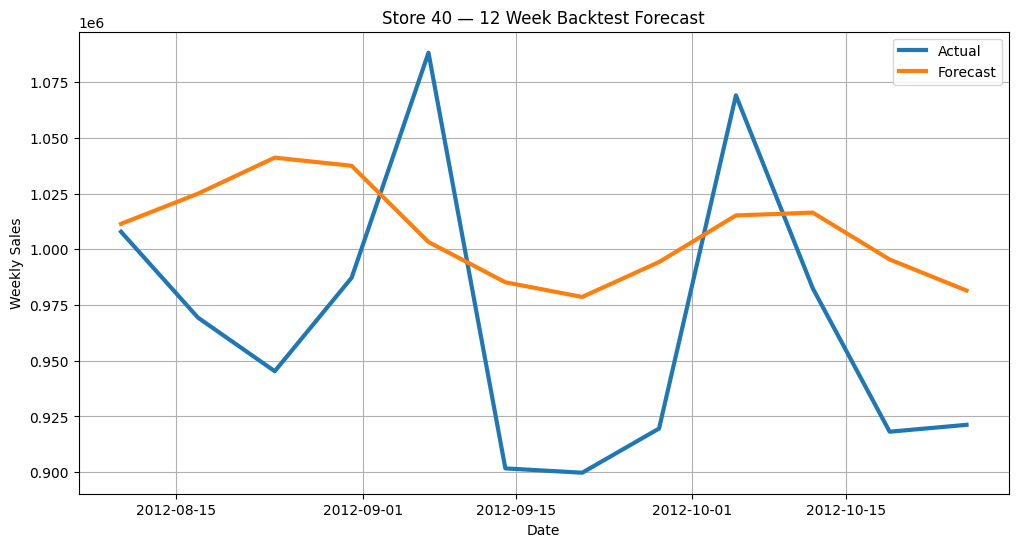


========== STORE 41 BACKTEST ==========
MAE  = 24194.65
RMSE = 32244.71
MAPE = 1.71%



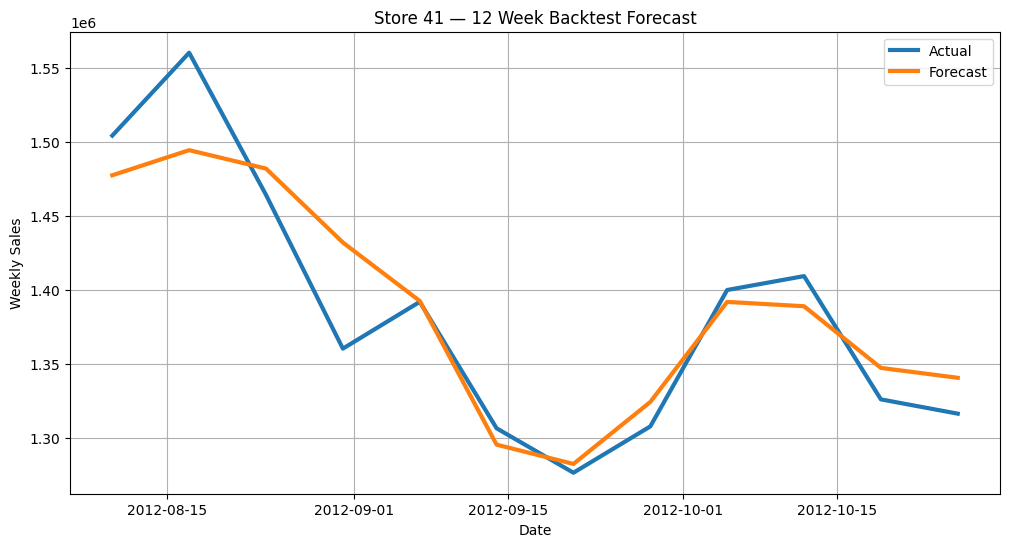


========== STORE 42 BACKTEST ==========
MAE  = 32352.23
RMSE = 37464.84
MAPE = 6.04%



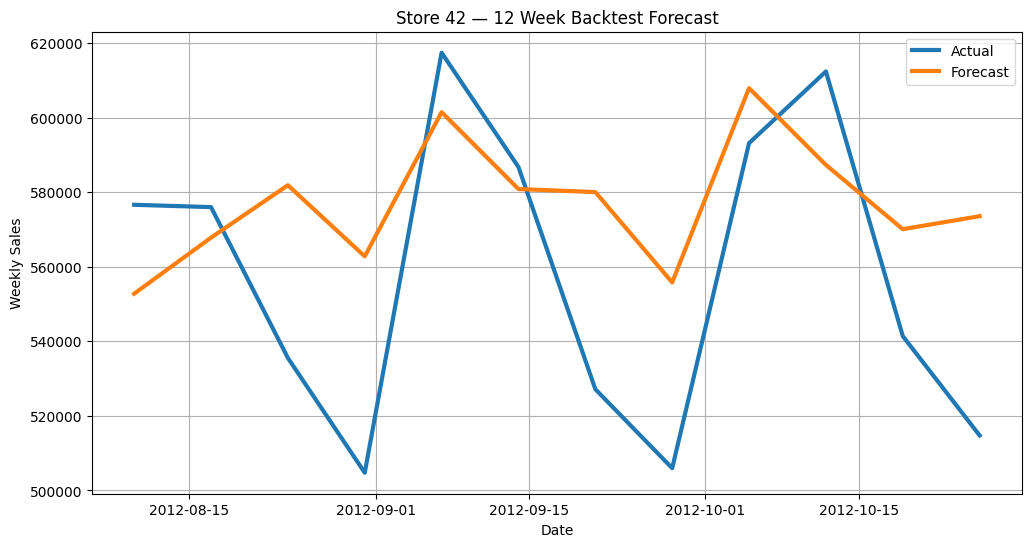


========== STORE 43 BACKTEST ==========
MAE  = 23400.04
RMSE = 27625.83
MAPE = 3.83%



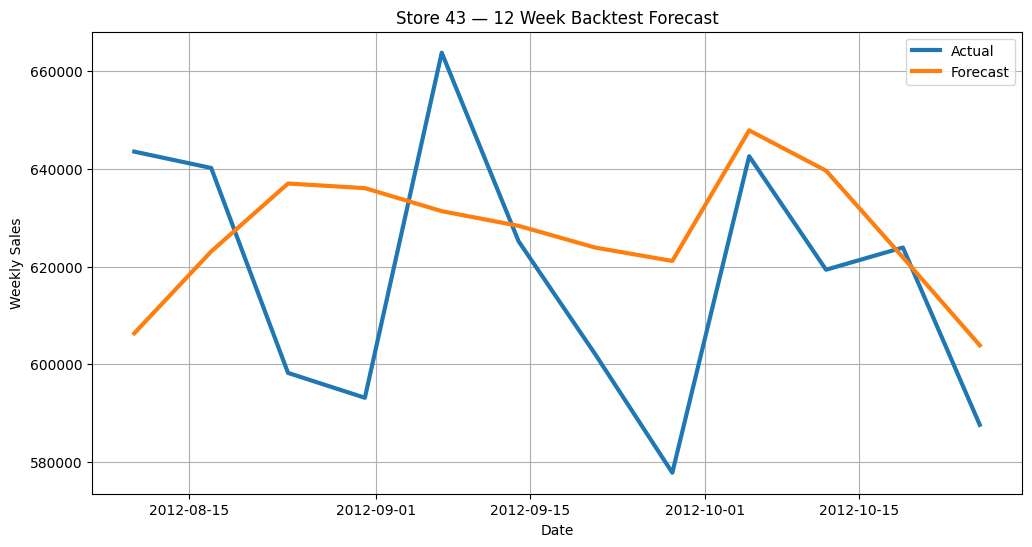


========== STORE 44 BACKTEST ==========
MAE  = 9405.10
RMSE = 12230.89
MAPE = 2.74%



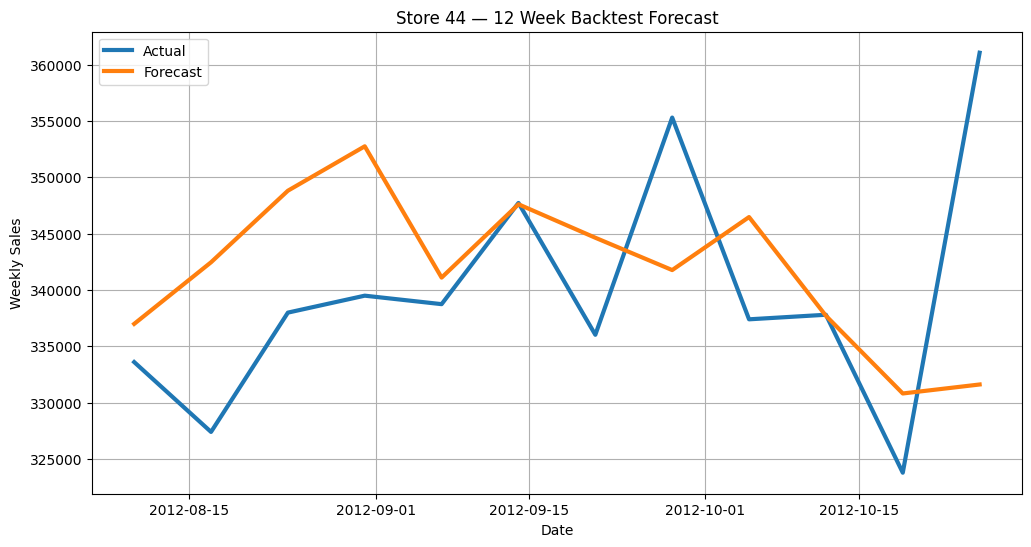


========== STORE 45 BACKTEST ==========
MAE  = 35503.42
RMSE = 42772.52
MAPE = 4.89%



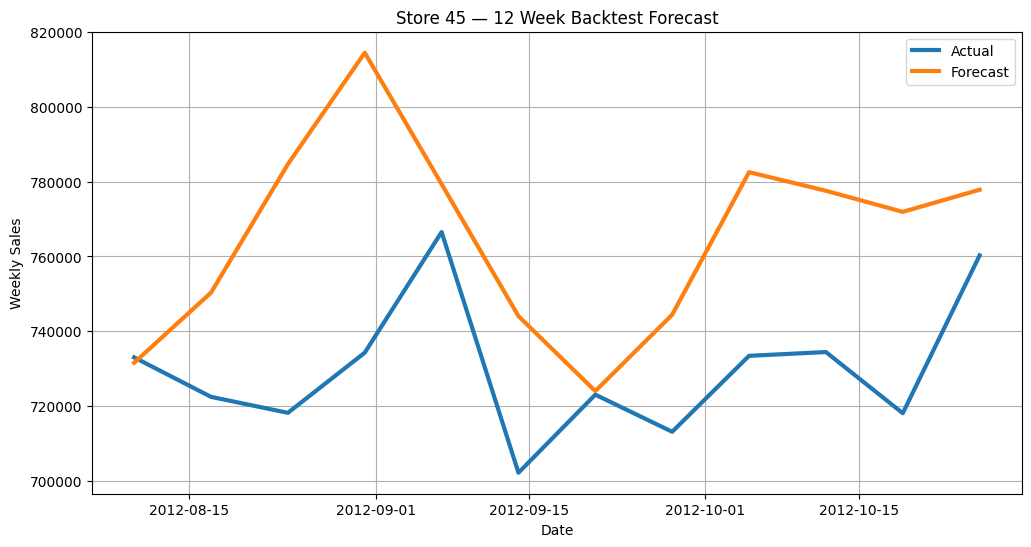


   Forecasting feature: CPI

Saved model for feature CPI → prophet_feature_CPI.pkl


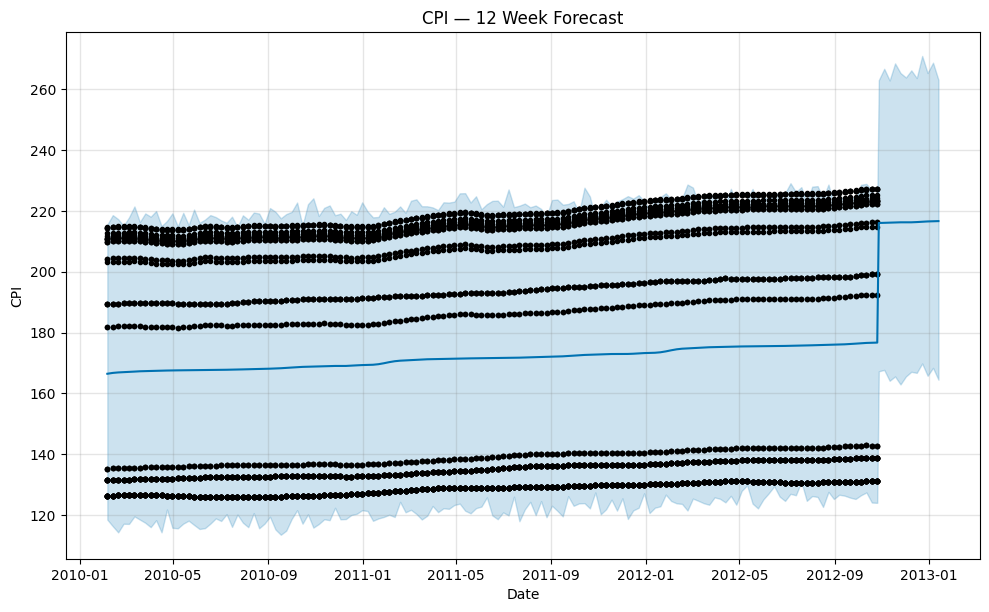


   Forecasting feature: Temperature

Saved model for feature Temperature → prophet_feature_Temperature.pkl


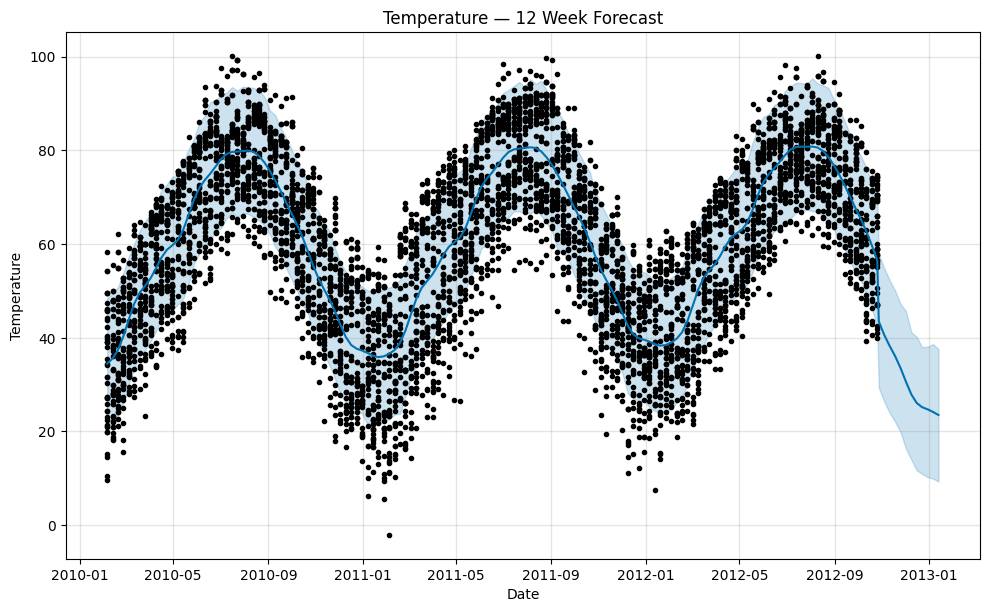


   Forecasting feature: Holiday_Flag

Saved model for feature Holiday_Flag → prophet_feature_Holiday_Flag.pkl


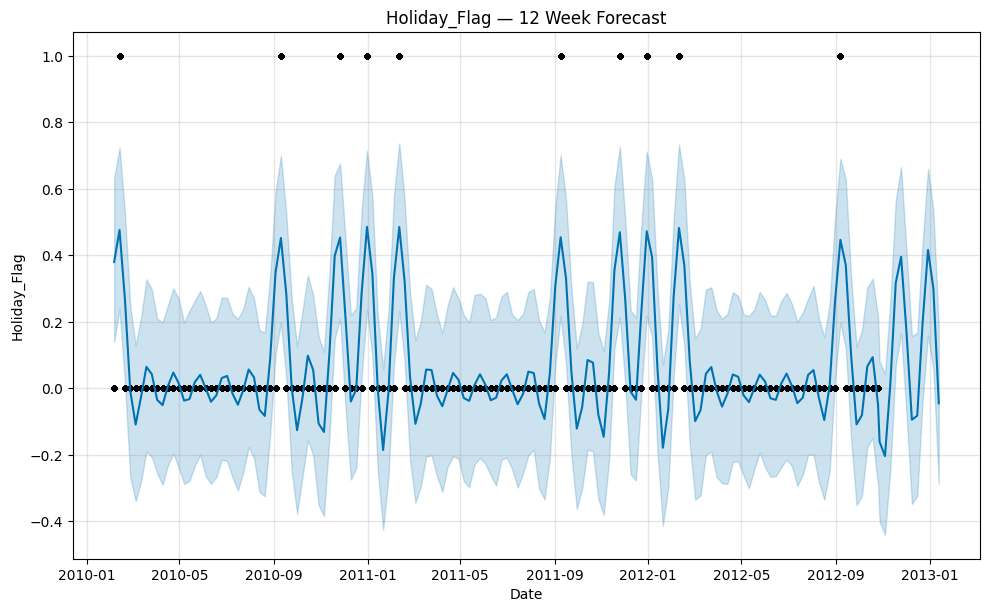


   Forecasting feature: Fuel_Price

Saved model for feature Fuel_Price → prophet_feature_Fuel_Price.pkl


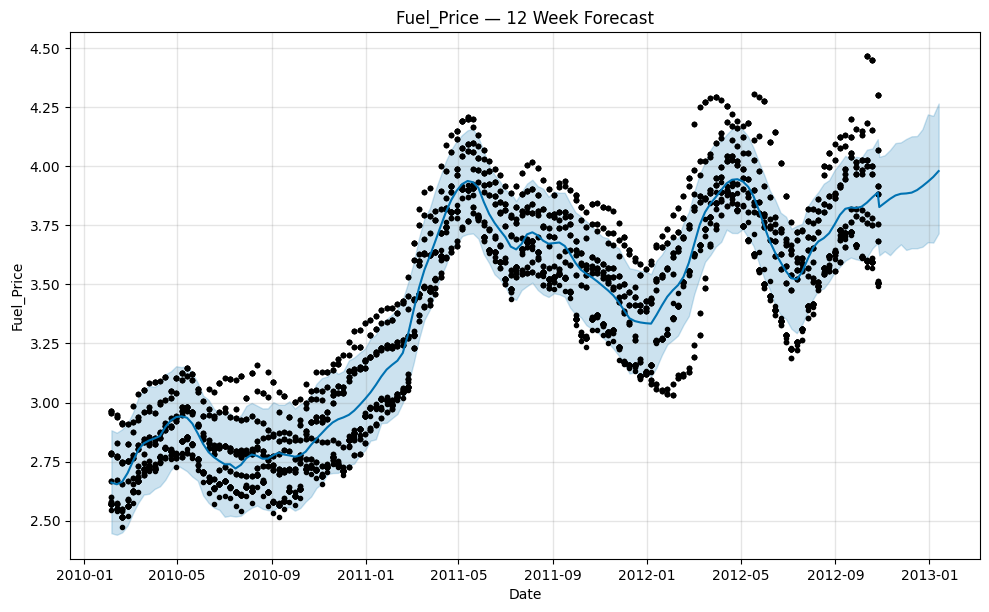


   Forecasting feature: Unemployment

Saved model for feature Unemployment → prophet_feature_Unemployment.pkl


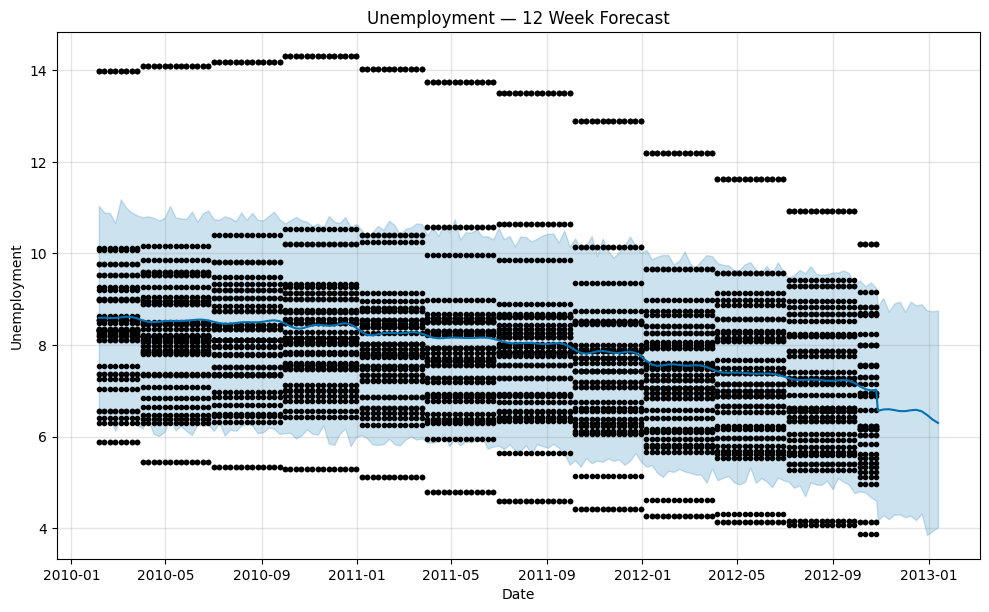

In [ ]:
# ----------------------------------------------------------------------
# 1. TOTAL WEEKLY SALES BY MONTH
# ----------------------------------------------------------------------
df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly.values)
plt.title("Total Weekly Sales Across All Stores by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 2. TOTAL SALES PER STORE
# ----------------------------------------------------------------------
store_sales = df.groupby("Store")["Weekly_Sales"].sum()

plt.figure(figsize=(12,6))
store_sales.plot(kind="bar")
plt.title("Total Sales of Each Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 3. TREND OF EACH STORE (MONTHLY LINE PLOT)
# ----------------------------------------------------------------------
plt.figure(figsize=(14,8))

for store, data in df.groupby("Store"):
    monthly = data.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()
    plt.plot(monthly.index, monthly.values, label=f"Store {store}")

plt.title("Monthly Sales Trend of Each Store")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 4. FEATURE TRENDS AGAINST WEEKLY SALES (LINE CORRELATION)
# ----------------------------------------------------------------------
features = ["CPI", "Temperature", "Holiday_Flag", "Fuel_Price", "Unemployment"]

for col in features:
    plt.figure(figsize=(12,5))

    monthly_feat = df.groupby(pd.Grouper(key='Date', freq='M'))[col].mean()
    monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].mean()

    ax1 = plt.gca()
    ax2 = ax1.twinx()

    ax1.plot(monthly_feat.index, monthly_feat.values, color='blue', linewidth=2)
    ax1.set_ylabel(col, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2.plot(monthly_sales.index, monthly_sales.values, color='red', linewidth=2)
    ax2.set_ylabel("Weekly Sales", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f"{col} vs Weekly Sales (Dual Axis Trend)")
    plt.grid(True)
    plt.show()

    # Identify stores
stores = df['Store'].unique()
features = ["CPI", "Temperature", "Holiday_Flag", "Fuel_Price", "Unemployment"]

# ----------------------------------------------------------------------
# 5. BACKTEST — FORECAST LAST 12 WEEKS
# ----------------------------------------------------------------------
backtest_results = {}

for store in stores:
    store_data = df[df['Store'] == store].sort_values('Date')

    # Use all data except last 12 weeks for training
    train = store_data.iloc[:-12]
    test = store_data.iloc[-12:]

    # Prepare Prophet dataframe
    df_train = train[['Date', 'Weekly_Sales'] + features].rename(columns={'Date':'ds','Weekly_Sales':'y'})

    # Prophet model with improvements
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.5
    )

    # Add regressors
    for feat in features:
        model.add_regressor(feat)

    # Fit model
    model.fit(df_train)

    # Prepare future dataframe for 12 weeks
    df_future = test[['Date'] + features].rename(columns={'Date':'ds'})
    forecast = model.predict(df_future)

    # Merge forecast with actuals
    compare = pd.DataFrame({
        'Date': test['Date'].values,
        'Actual': test['Weekly_Sales'].values,
        'Forecast': forecast['yhat'].values
    })

    # Metrics
    mae = mean_absolute_error(compare['Actual'], compare['Forecast'])
    rmse = np.sqrt(mean_squared_error(compare['Actual'], compare['Forecast']))
    mape = np.mean(np.abs((compare['Actual'] - compare['Forecast']) / compare['Actual'])) * 100

    backtest_results[store] = compare

    print(f"\n========== STORE {store} BACKTEST ==========")
    print(f"MAE  = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAPE = {mape:.2f}%")
    print("===========================================\n")

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(compare['Date'], compare['Actual'], label='Actual', linewidth=3)
    plt.plot(compare['Date'], compare['Forecast'], label='Forecast', linewidth=3)
    plt.title(f"Store {store} — 12 Week Backtest Forecast")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------------------------------------------------------
# 6. FORECAST — NEXT 12 WEEKS FOR EACH FEATURE (SAVE PKL)
# ----------------------------------------------------------------------
import joblib

forecast_feature_results = {}

for col in features:
    print(f"\n==========================")
    print(f"   Forecasting feature: {col}")
    print("==========================\n")

    df_feat = df[['Date', col]].rename(columns={'Date':'ds', col:'y'})
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    model.fit(df_feat)

    # Save feature model
    filename = f"prophet_feature_{col}.pkl"
    joblib.dump(model, filename)
    print(f"Saved model for feature {col} → {filename}")

    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)
    forecast_feature_results[col] = forecast

    model.plot(forecast, xlabel="Date", ylabel=col)
    plt.title(f"{col} — 12 Week Forecast")
    plt.grid(True)
    plt.show()


In [ ]:
all_store_forecasts = []

for store, forecast in forecast_results_store.items():
    temp = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    temp['Store'] = store
    all_store_forecasts.append(temp)

df_store_forecast = pd.concat(all_store_forecasts, ignore_index=True)
df_store_forecast.to_csv("/content/forecast_stores.csv", index=False)

# -------------------------------
# 2. SAVE FORECASTS PER FEATURE
# -------------------------------
all_feature_forecasts = []

for feature, forecast in forecast_feature_results.items():
    temp = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    temp['Feature'] = feature
    all_feature_forecasts.append(temp)

df_feature_forecast = pd.concat(all_feature_forecasts, ignore_index=True)
df_feature_forecast.to_csv("/content/forecast_features.csv", index=False)

In [ ]:
# ----------------------------------------------------------------------
# 1. SAVE ALL STORE MODELS INTO ONE FILE
# ----------------------------------------------------------------------
store_models = {}

for store, data in df.groupby("Store"):
    df_prophet = data[['Date', 'Weekly_Sales']].rename(columns={'Date':'ds', 'Weekly_Sales':'y'})
    model = Prophet()
    model.fit(df_prophet)
    store_models[store] = model

# Save all store models in one file
joblib.dump(store_models, "prophet_models_stores.pkl")
print("Saved all store Prophet models into 'prophet_models_stores.pkl'.")

# ----------------------------------------------------------------------
# 2. SAVE ALL FEATURE MODELS INTO ONE FILE
# ----------------------------------------------------------------------
features = ["CPI", "Temperature", "Holiday_Flag", "Fuel_Price", "Unemployment"]
feature_models = {}

for col in features:
    df_feat = df[['Date', col]].rename(columns={'Date':'ds', col:'y'})
    model = Prophet()
    model.fit(df_feat)
    feature_models[col] = model

# Save all feature models in one file
joblib.dump(feature_models, "prophet_models_features.pkl")
print("Saved all feature Prophet models into 'prophet_models_features.pkl'.")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

Saved all store Prophet models into 'prophet_models_stores.pkl'.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Saved all feature Prophet models into 'prophet_models_features.pkl'.


In [ ]:
# Dictionary to store anomalies
anomalies_store = {}

for store, data in df.groupby("Store"):

    # Prepare Prophet dataframe
    df_prophet = data[['Date', 'Weekly_Sales']].rename(columns={'Date':'ds', 'Weekly_Sales':'y'})

    # Fit the model
    model = Prophet()
    model.fit(df_prophet)

    # Forecast next 12 weeks
    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    # Merge actuals with forecast
    merged = pd.merge(df_prophet, forecast[['ds','yhat','yhat_lower','yhat_upper']], on='ds', how='left')

    # Detect anomalies: actual outside forecast bounds
    merged['anomaly'] = ((merged['y'] > merged['yhat_upper']) | (merged['y'] < merged['yhat_lower']))

    # Store anomalies
    anomalies_store[store] = merged[merged['anomaly']]

    # Alert if anomalies exist
    if merged['anomaly'].any():
        print(f"Alert! Anomalies detected in Store {store}:")
        print(merged[merged['anomaly']][['ds','y','yhat','yhat_lower','yhat_upper']])
    else:
        print(f"No anomalies detected in Store {store}.")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 1:
            ds           y          yhat    yhat_lower    yhat_upper
26  2010-08-06  1605491.78  1.452394e+06  1.316614e+06  1.587333e+06
41  2010-11-19  1483784.18  1.634690e+06  1.502255e+06  1.777125e+06
42  2010-11-26  1955624.11  1.655070e+06  1.524446e+06  1.787462e+06
43  2010-12-03  1548033.78  1.701506e+06  1.567256e+06  1.831257e+06
46  2010-12-24  2387950.20  1.904811e+06  1.759451e+06  2.037299e+06
47  2010-12-31  1367320.01  1.723910e+06  1.586421e+06  1.854707e+06
91  2011-11-04  1697229.58  1.533213e+06  1.394033e+06  1.662037e+06
93  2011-11-18  1539483.70  1.686044e+06  1.550570e+06  1.817020e+06
94  2011-11-25  2033320.66  1.708880e+06  1.583985e+06  1.840732e+06
95  2011-12-02  1584083.95  1.746116e+06  1.610960e+06  1.880112e+06
98  2011-12-23  2270188.99  1.976670e+06  1.845459e+06  2.101247e+06
99  2011-12-30  1497462.72  1.824133e+06  1.687624e+06  1.957461e+06
103 2012-01-27  1319325.59  1.460426e+06  1.320776e+06  1.599100e

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 3:
            ds          y           yhat     yhat_lower     yhat_upper
0   2010-02-05  461622.22  408055.988997  373220.254494  440984.335863
8   2010-04-02  423294.40  383707.119875  350227.514903  419449.990424
26  2010-08-06  402635.76  360093.701572  324835.737496  392253.745958
39  2010-11-05  423175.56  386447.930393  352444.073819  420814.615075
41  2010-11-19  372545.32  438736.106509  406023.048159  470768.358981
42  2010-11-26  565567.84  458744.201621  423889.662072  491978.050138
46  2010-12-24  605990.41  485865.746677  453542.206793  522974.897835
47  2010-12-31  382677.76  434461.627303  402942.462457  471421.226215
49  2011-01-14  381061.10  339569.456092  305148.673437  377109.458061
77  2011-07-29  345381.29  380949.272154  347338.931692  414987.083475
91  2011-11-04  459443.22  403303.461907  368574.785944  435718.596761
93  2011-11-18  398838.97  456528.946393  424384.934730  489496.784631
94  2011-11-25  556925.19  477415.67875

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 5:
            ds          y           yhat     yhat_lower     yhat_upper
13  2010-05-07  333522.60  293927.488506  264753.786669  328947.500599
17  2010-06-04  337825.89  303301.824482  272147.456304  334185.570457
41  2010-11-19  297384.81  362707.719801  332771.070260  396715.480186
42  2010-11-26  488362.61  379123.597777  348083.848089  408848.350482
43  2010-12-03  344490.88  381605.890373  349318.773608  413238.880256
46  2010-12-24  466010.25  378170.533822  346849.958548  408537.952932
47  2010-12-31  298180.18  345862.790768  316425.073393  376362.695654
91  2011-11-04  353652.23  309376.161199  277211.954482  341599.602246
93  2011-11-18  307944.37  375627.368206  343941.858178  406789.916727
94  2011-11-25  507900.07  395429.509277  364490.722912  426829.944220
96  2011-12-09  367433.77  400503.639410  370064.840793  433543.870415
98  2011-12-23  458562.24  399435.878402  370082.239785  431573.812840
113 2012-04-06  402985.70  343690.01799

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 7:
            ds           y           yhat     yhat_lower     yhat_upper
8   2010-04-02   561145.14  488586.475191  419125.360237  555316.231754
19  2010-06-18   481144.09  563994.234421  497002.590377  633254.388589
41  2010-11-19   482528.36  608410.736650  538863.079435  671165.287897
42  2010-11-26   835189.26  630868.336137  562349.189740  694374.209357
43  2010-12-03   552811.62  636700.036796  568397.888810  702366.650467
44  2010-12-10   599730.07  676036.960360  608670.237589  741338.624553
46  2010-12-24  1045124.88  836419.924363  767641.361536  904031.790779
47  2010-12-31   729572.08  820877.219147  757428.792638  887792.224191
74  2011-07-08   761793.94  677651.683984  611204.350807  742821.666055
93  2011-11-18   539826.56  649159.241155  586010.044307  720514.501129
94  2011-11-25   949075.87  677945.062118  605395.244601  747437.197630
95  2011-12-02   591907.88  682722.200751  616499.776309  751580.150786
97  2011-12-16   720242.19

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 9:
            ds          y           yhat     yhat_lower     yhat_upper
17  2010-06-04  586061.46  524382.083528  471512.093705  579425.359613
41  2010-11-19  519823.30  598820.209679  545253.178966  653061.507157
42  2010-11-26  768070.53  613338.951921  567800.480513  669338.288164
43  2010-12-03  578164.82  636392.254259  580842.561102  689501.202002
44  2010-12-10  618121.82  677865.037603  626008.716690  730388.257032
46  2010-12-24  873347.55  691545.164582  638458.517309  744900.496334
47  2010-12-31  459770.85  605296.279905  554150.243000  659688.563406
93  2011-11-18  542414.27  627017.301084  573900.415760  678282.461410
94  2011-11-25  814753.50  642620.059593  588549.295016  696124.181714
96  2011-12-09  630327.28  701624.281556  653797.739449  750244.557627
98  2011-12-23  905324.68  732010.333398  681905.860309  784350.728803
99  2011-12-30  549788.36  656232.328367  605697.043708  710014.190840
108 2012-03-02  619498.28  566531.70886

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 11:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19  1292346.57  1.420729e+06  1.298981e+06  1.556457e+06
42  2010-11-26  1757242.51  1.450759e+06  1.314977e+06  1.584991e+06
43  2010-12-03  1380522.64  1.552523e+06  1.424041e+06  1.678576e+06
44  2010-12-10  1564516.43  1.724074e+06  1.590677e+06  1.854394e+06
46  2010-12-24  2306265.36  1.805067e+06  1.669354e+06  1.936884e+06
47  2010-12-31  1172003.10  1.560198e+06  1.440713e+06  1.694977e+06
51  2011-01-28  1100418.69  1.266467e+06  1.142436e+06  1.397928e+06
91  2011-11-04  1458287.38  1.331216e+06  1.194680e+06  1.455095e+06
93  2011-11-18  1315091.63  1.448739e+06  1.315408e+06  1.586341e+06
94  2011-11-25  1848953.48  1.473263e+06  1.350538e+06  1.600939e+06
95  2011-12-02  1399322.44  1.559299e+06  1.417369e+06  1.708244e+06
98  2011-12-23  2213518.50  1.862074e+06  1.738796e+06  1.992268e+06
99  2011-12-30  1352084.21  1.646494e+06  1.514957e+06  1.773426

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 13:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  2142482.14  1.902636e+06  1.697165e+06  2.119886e+06
41  2010-11-19  1925393.91  2.126299e+06  1.926480e+06  2.335836e+06
42  2010-11-26  2766400.05  2.190006e+06  1.995982e+06  2.397602e+06
43  2010-12-03  2083379.89  2.371083e+06  2.163941e+06  2.572596e+06
46  2010-12-24  3595903.20  2.738311e+06  2.518007e+06  2.939276e+06
47  2010-12-31  1675292.00  2.320299e+06  2.125314e+06  2.534914e+06
94  2011-11-25  2864170.61  2.246177e+06  2.034266e+06  2.451484e+06
95  2011-12-02  2051315.66  2.402506e+06  2.191122e+06  2.601300e+06
96  2011-12-09  2462779.06  2.677342e+06  2.473860e+06  2.870069e+06
98  2011-12-23  3556766.03  2.859297e+06  2.658687e+06  3.063332e+06
99  2011-12-30  1969056.91  2.485478e+06  2.273223e+06  2.697570e+06
113 2012-04-06  2271614.76  2.061152e+06  1.849805e+06  2.265895e+06
Alert! Anomalies detected in Store 14:
            ds           

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 15:
            ds           y           yhat     yhat_lower    yhat_upper
8   2010-04-02   718470.71  615287.966233  520054.963812  7.142311e+05
41  2010-11-19   608200.81  750369.390100  660274.804946  8.478779e+05
42  2010-11-26  1120018.92  802191.962555  713364.082511  8.990807e+05
43  2010-12-03   754134.95  862570.846582  776046.425492  9.546753e+05
44  2010-12-10   847294.04  940715.598560  850493.689568  1.033729e+06
46  2010-12-24  1368318.17  946742.712060  861005.510917  1.045754e+06
47  2010-12-31   543754.17  780664.022671  689897.087232  8.754831e+05
93  2011-11-18   597856.51  717757.846621  630192.564424  8.078798e+05
94  2011-11-25  1066478.10  770855.905861  672230.948155  8.639389e+05
95  2011-12-02   699028.66  827914.006690  732938.334932  9.183846e+05
96  2011-12-09   764565.55  904441.081261  817532.959168  9.990656e+05
97  2011-12-16   870415.49  966506.386115  886143.173563  1.066625e+06
98  2011-12-23  1182691.87  942111.893

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 17:
            ds           y          yhat    yhat_lower    yhat_upper
10  2010-04-16   757738.76  8.632110e+05  7.625016e+05  9.576589e+05
11  2010-04-23   977790.83  8.752715e+05  7.825919e+05  9.722838e+05
31  2010-09-10  1200888.28  1.003253e+06  9.105570e+05  1.102296e+06
32  2010-09-17   871264.25  9.767951e+05  8.835434e+05  1.072824e+06
41  2010-11-19   782252.57  9.032256e+05  8.030060e+05  9.974209e+05
46  2010-12-24  1309226.79  1.049345e+06  9.512031e+05  1.144142e+06
47  2010-12-31   635862.55  1.016441e+06  9.180973e+05  1.111985e+06
48  2011-01-07  1083071.14  9.167319e+05  8.207259e+05  1.016610e+06
63  2011-04-22  1060770.11  9.287197e+05  8.319627e+05  1.020586e+06
64  2011-04-29   806979.15  9.090768e+05  8.092841e+05  1.000987e+06
82  2011-09-02   847380.07  9.651700e+05  8.699563e+05  1.066542e+06
83  2011-09-09  1161900.18  1.049687e+06  9.564068e+05  1.145548e+06
94  2011-11-25  1225700.28  9.982851e+05  8.979878e+05  1.102751

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 19:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1642970.27  1.455390e+06  1.299963e+06  1.610106e+06
15  2010-05-21  1377716.17  1.522681e+06  1.382056e+06  1.676602e+06
16  2010-05-28  1648882.62  1.499574e+06  1.356368e+06  1.646241e+06
41  2010-11-19  1377593.10  1.595122e+06  1.442075e+06  1.752082e+06
42  2010-11-26  1993367.83  1.616329e+06  1.468425e+06  1.763717e+06
45  2010-12-17  1911967.44  2.074021e+06  1.915861e+06  2.237776e+06
46  2010-12-24  2678206.42  2.004060e+06  1.860152e+06  2.151929e+06
47  2010-12-31  1275146.94  1.688018e+06  1.542693e+06  1.832084e+06
93  2011-11-18  1411835.57  1.560749e+06  1.418049e+06  1.702220e+06
94  2011-11-25  1974646.78  1.577586e+06  1.431381e+06  1.726361e+06
95  2011-12-02  1484708.38  1.663036e+06  1.518440e+06  1.813150e+06
97  2011-12-16  1852179.15  2.029128e+06  1.869691e+06  2.180366e+06
98  2011-12-23  2480159.47  2.007510e+06  1.857709e+06  2.153722

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 22:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1177340.99  1.016444e+06  8.929779e+05  1.137194e+06
41  2010-11-19   985896.44  1.145983e+06  1.030009e+06  1.260241e+06
42  2010-11-26  1564502.26  1.211677e+06  1.093200e+06  1.327802e+06
44  2010-12-10  1367202.84  1.495457e+06  1.376472e+06  1.618366e+06
46  2010-12-24  1962445.04  1.453405e+06  1.333661e+06  1.577919e+06
47  2010-12-31   774262.28  1.183475e+06  1.058715e+06  1.313328e+06
63  2011-04-22  1152781.90  1.010653e+06  8.884005e+05  1.135612e+06
81  2011-08-26  1181815.31  1.055866e+06  9.432518e+05  1.174385e+06
93  2011-11-18  1007579.44  1.138807e+06  1.020802e+06  1.268418e+06
94  2011-11-25  1535857.49  1.195764e+06  1.078011e+06  1.313888e+06
95  2011-12-02  1167621.14  1.313363e+06  1.198888e+06  1.431476e+06
96  2011-12-09  1308967.44  1.470430e+06  1.348865e+06  1.595616e+06
98  2011-12-23  1863195.68  1.487602e+06  1.365870e+06  1.602841

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 24:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1478321.26  1.282178e+06  1.138053e+06  1.425936e+06
13  2010-05-07  1409705.03  1.259401e+06  1.115816e+06  1.406746e+06
17  2010-06-04  1566668.91  1.408385e+06  1.268873e+06  1.549355e+06
22  2010-07-09  1665502.55  1.488044e+06  1.347056e+06  1.635751e+06
41  2010-11-19  1277150.60  1.437948e+06  1.298438e+06  1.587320e+06
42  2010-11-26  1779276.51  1.465695e+06  1.322919e+06  1.607143e+06
46  2010-12-24  2386015.75  1.784839e+06  1.645137e+06  1.932225e+06
47  2010-12-31  1208600.05  1.582496e+06  1.448038e+06  1.717431e+06
67  2011-05-20  1234281.70  1.389575e+06  1.242245e+06  1.531190e+06
69  2011-06-03  1554837.62  1.399210e+06  1.259079e+06  1.531761e+06
82  2011-09-02  1196105.44  1.373587e+06  1.226398e+06  1.511165e+06
83  2011-09-09  1527455.19  1.330895e+06  1.178535e+06  1.470783e+06
94  2011-11-25  1761235.67  1.456798e+06  1.309440e+06  1.594636

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 26:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1029849.20  9.286909e+05  8.375275e+05  1.021067e+06
13  2010-05-07  1074479.73  9.380306e+05  8.490345e+05  1.026284e+06
41  2010-11-19   901972.70  1.049567e+06  9.629232e+05  1.146456e+06
42  2010-11-26  1286833.62  1.066802e+06  9.707054e+05  1.163190e+06
46  2010-12-24  1573982.47  1.259507e+06  1.170305e+06  1.351080e+06
47  2010-12-31   877268.29  1.117204e+06  1.029763e+06  1.204000e+06
65  2011-05-06  1024778.23  9.287805e+05  8.372911e+05  1.014641e+06
87  2011-10-07  1130022.99  1.010330e+06  9.199427e+05  1.099985e+06
93  2011-11-18   946091.79  1.062378e+06  9.772980e+05  1.160339e+06
94  2011-11-25  1282320.05  1.081700e+06  9.886101e+05  1.178671e+06
95  2011-12-02  1012498.49  1.112409e+06  1.026295e+06  1.203551e+06
98  2011-12-23  1515175.01  1.290734e+06  1.199405e+06  1.384094e+06
99  2011-12-30   972834.42  1.170327e+06  1.080292e+06  1.254402

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 28:
            ds           y          yhat    yhat_lower    yhat_upper
0   2010-02-05  1672352.29  1.486589e+06  1.304192e+06  1.670992e+06
13  2010-05-07  1532893.22  1.285191e+06  1.120384e+06  1.450983e+06
17  2010-06-04  1543678.02  1.285939e+06  1.120643e+06  1.458380e+06
26  2010-08-06  1523101.38  1.268919e+06  1.081589e+06  1.450883e+06
30  2010-09-03  1523410.71  1.322427e+06  1.152839e+06  1.498918e+06
39  2010-11-05  1501663.26  1.323497e+06  1.147054e+06  1.494464e+06
40  2010-11-12  1266460.45  1.451607e+06  1.284724e+06  1.625147e+06
41  2010-11-19  1179315.72  1.535932e+06  1.353360e+06  1.709479e+06
42  2010-11-26  1937033.50  1.538554e+06  1.365320e+06  1.711779e+06
46  2010-12-24  2026026.39  1.603227e+06  1.417381e+06  1.775451e+06
47  2010-12-31  1090558.57  1.477714e+06  1.292707e+06  1.665145e+06
55  2011-02-25  1311796.91  1.500346e+06  1.318281e+06  1.676469e+06
56  2011-03-04  1723736.91  1.466423e+06  1.293882e+06  1.646472

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 30:
            ds          y           yhat     yhat_lower     yhat_upper
30  2010-09-03  461548.98  433423.600665  409437.626061  454701.614164
32  2010-09-17  462058.19  434227.683525  413844.529313  456663.641024
39  2010-11-05  484661.87  450605.509740  431233.450363  471561.070134
42  2010-11-26  462732.36  437571.724440  414996.947602  459312.760975
43  2010-12-03  407112.22  438464.409141  418037.776162  459362.443088
46  2010-12-24  519354.88  460036.139252  438503.173312  480716.037602
47  2010-12-31  397631.02  453889.641668  432122.382754  475754.431961
49  2011-01-14  465408.72  442298.616826  420881.565879  464279.760647
51  2011-01-28  425989.04  453666.137409  432246.033677  475228.101309
52  2011-02-04  490970.95  454810.722887  433084.648840  475009.526158
54  2011-02-18  417070.51  444030.012129  423634.993397  465228.218263
82  2011-09-02  369722.32  407340.318004  384750.322826  430231.620647
83  2011-09-09  370897.82  408027.6404

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 32:
           ds           y          yhat    yhat_lower    yhat_upper
42 2010-11-26  1634635.86  1.291172e+06  1.182379e+06  1.403055e+06
43 2010-12-03  1200892.56  1.385117e+06  1.272495e+06  1.492416e+06
44 2010-12-10  1377322.73  1.510073e+06  1.390801e+06  1.628942e+06
46 2010-12-24  1949183.14  1.510414e+06  1.395274e+06  1.614585e+06
47 2010-12-31   955463.84  1.306836e+06  1.191273e+06  1.418057e+06
94 2011-11-25  1684468.66  1.317003e+06  1.196968e+06  1.430658e+06
95 2011-12-02  1179773.88  1.401441e+06  1.289250e+06  1.508910e+06
98 2011-12-23  1959526.96  1.571406e+06  1.461169e+06  1.685413e+06
99 2011-12-30  1102367.65  1.385887e+06  1.270633e+06  1.503746e+06
Alert! Anomalies detected in Store 33:
            ds          y           yhat     yhat_lower     yhat_upper
5   2010-03-12  312161.00  284184.203067  261083.095316  309886.327310
9   2010-04-09  325201.05  291167.358475  268255.393496  316600.229314
11  2010-04-23  263263.02  28

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 34:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19   955766.33  1.045192e+06  9.567710e+05  1.132997e+06
42  2010-11-26  1309476.68  1.061282e+06  9.710264e+05  1.150860e+06
43  2010-12-03  1001512.21  1.098018e+06  1.009899e+06  1.182590e+06
46  2010-12-24  1620748.25  1.251387e+06  1.157851e+06  1.338494e+06
47  2010-12-31   902109.69  1.136202e+06  1.046738e+06  1.231067e+06
93  2011-11-18   947552.44  1.065206e+06  9.665655e+05  1.149728e+06
94  2011-11-25  1345595.82  1.081815e+06  9.956285e+05  1.175164e+06
95  2011-12-02   988742.08  1.112191e+06  1.024355e+06  1.191942e+06
96  2011-12-09  1084243.91  1.182743e+06  1.106121e+06  1.272421e+06
97  2011-12-16  1151052.86  1.264941e+06  1.172018e+06  1.360834e+06
98  2011-12-23  1593655.96  1.283592e+06  1.192002e+06  1.376727e+06
99  2011-12-30   965512.36  1.187826e+06  1.103594e+06  1.280051e+06
113 2012-04-06  1091020.37  9.866490e+05  8.888752e+05  1.074568

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 36:
            ds          y           yhat     yhat_lower     yhat_upper
6   2010-03-19  428851.99  455268.485278  431929.479665  479329.630469
7   2010-03-26  404438.51  455297.785883  433506.869874  476591.552118
8   2010-04-02  435972.82  461096.342751  438197.670423  482203.977351
11  2010-04-23  434116.80  461320.771245  437686.960992  484097.601641
13  2010-05-07  489372.02  459390.870512  436351.385888  480653.802402
19  2010-06-18  485694.72  459231.779528  436605.134372  481909.396326
22  2010-07-09  471713.59  442233.271505  419942.969255  464324.881897
23  2010-07-16  466962.04  442762.377727  418243.409142  463326.670142
27  2010-08-13  470436.80  444333.844719  422633.107896  466333.669976
29  2010-08-27  412050.73  436259.445363  415051.584089  459234.225924
32  2010-09-17  454694.21  423057.045930  400154.245935  446041.095977
36  2010-10-15  453308.15  424327.866833  403949.418894  448396.896714
43  2010-12-03  360266.09  393851.4469

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 38:
            ds          y           yhat     yhat_lower     yhat_upper
13  2010-05-07  383657.44  345783.594446  316207.684064  377568.930796
17  2010-06-04  376184.88  337595.621098  305287.051485  367437.634125
26  2010-08-06  378574.44  344816.388296  314547.919834  376100.864069
39  2010-11-05  380870.09  350549.868917  319685.110781  380569.005591
47  2010-12-31  303908.81  353118.553796  322856.037462  386479.785093
64  2011-04-29  344225.99  380099.085541  348378.124240  407434.335112
65  2011-05-06  422186.65  383493.357151  354450.185579  415205.362939
77  2011-07-29  355131.33  390504.185995  359480.303898  419420.008508
78  2011-08-05  437631.44  388315.149381  356965.098049  419307.722573
87  2011-10-07  449516.29  390124.012573  363171.394140  420024.223151
91  2011-11-04  436970.10  396511.154343  364624.787330  427958.311808
96  2011-12-09  435401.64  404403.214950  371022.830498  434012.143032
99  2011-12-30  342667.35  401086.5203

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 40:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1041202.13  8.937143e+05  7.891968e+05  9.969633e+05
13  2010-05-07  1009797.06  8.853510e+05  7.881013e+05  9.899244e+05
41  2010-11-19   852452.93  9.990270e+05  9.055366e+05  1.093032e+06
42  2010-11-26  1166142.85  1.014690e+06  9.039641e+05  1.108844e+06
45  2010-12-17  1179036.30  1.293123e+06  1.193911e+06  1.395699e+06
46  2010-12-24  1648829.18  1.270814e+06  1.171629e+06  1.372398e+06
47  2010-12-31   811318.30  1.098585e+06  9.943746e+05  1.194878e+06
65  2011-05-06  1016752.55  8.913276e+05  7.869384e+05  9.906768e+05
87  2011-10-07  1070389.98  9.663089e+05  8.689517e+05  1.065337e+06
93  2011-11-18   905399.99  1.014571e+06  9.125740e+05  1.118587e+06
94  2011-11-25  1230011.95  1.027579e+06  9.269784e+05  1.124410e+06
98  2011-12-23  1601585.70  1.304404e+06  1.204750e+06  1.398494e+06
99  2011-12-30   908853.15  1.155269e+06  1.053690e+06  1.257623

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 42:
            ds          y           yhat     yhat_lower     yhat_upper
3   2010-02-26  491510.58  550840.425314  498936.834898  604434.527124
7   2010-03-26  478021.68  532701.287302  479942.935851  592041.382723
18  2010-06-11  607218.60  530852.763395  474036.228509  588712.385110
26  2010-08-06  579544.21  518103.066134  462872.565808  577316.400038
27  2010-08-13  583079.97  516023.270234  457718.672692  571987.640180
31  2010-09-10  589091.04  521501.826578  464026.006710  578640.747837
35  2010-10-08  599759.45  538725.100245  484537.686820  595368.025203
47  2010-12-31  428953.60  541501.336893  484496.293283  597257.733693
49  2011-01-14  613899.15  561632.298739  505557.169131  613165.788662
51  2011-01-28  499081.79  573802.280575  523108.117059  632030.948561
53  2011-02-11  628063.88  567757.682806  509265.456049  621423.638479
61  2011-04-08  620087.35  563131.121545  506753.836387  619219.918627
64  2011-04-29  496010.17  557633.7609

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 44:
            ds          y           yhat     yhat_lower     yhat_upper
15  2010-05-21  267065.35  288685.834270  271487.572586  304528.336589
26  2010-08-06  296804.49  279163.329145  263275.666929  295183.727892
39  2010-11-05  270516.84  289194.952725  274263.777225  305501.943209
42  2010-11-26  307646.50  276664.896614  260962.970922  293094.045183
45  2010-12-17  278646.35  298465.809574  281761.745301  314543.521260
46  2010-12-24  365098.24  301940.015481  285251.703695  318287.094127
47  2010-12-31  241937.11  293925.630040  277137.630894  310746.125892
77  2011-07-29  279677.00  296467.427249  279957.851172  314406.227581
81  2011-08-26  324174.79  307199.101810  290854.069321  323126.441941
98  2011-12-23  376233.89  326703.249204  310565.609060  343055.968028
99  2011-12-30  263917.85  320817.932250  304307.542812  337584.112754
110 2012-03-16  331965.95  315143.802144  298592.943695  331257.890558
111 2012-03-23  296947.06  314392.9957

In [ ]:
# Columns/features
features = ["Weekly_Sales", "CPI", "Temperature", "Fuel_Price", "Unemployment"]
holiday_col = "Holiday_Flag"

# Rolling window per feature (use longer window for slow-moving features)
rolling_window_by_feat = {
    "Weekly_Sales": 4,
    "CPI": 12,
    "Temperature": 4,
    "Fuel_Price": 8,
    "Unemployment": 12
}

# Per-feature thresholds for z-score and pct-change
feature_thresholds = {
    "Weekly_Sales": {"z": 2.0, "pct": 0.20},
    "CPI":          {"z": 1.5, "pct": 0.01},   # CPI: sensitive to small changes
    "Temperature":  {"z": 2.0, "pct": 0.10},
    "Fuel_Price":   {"z": 1.8, "pct": 0.03},
    "Unemployment": {"z": 1.5, "pct": 0.02}
}

# Robustness knobs
min_std_fraction = 0.005   # min std = fraction of mean (0.5%)
abs_std_floor = 1e-3       # absolute floor for std
pct_change_floor = 1e-9    # avoid divide by zero issues

# Holiday thresholds
holiday_low_factor = 0.6
holiday_high_factor = 1.4

# ---------- PREP ----------
# ensure datetime & sorting
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

# Ensure numeric types and clean holiday flag
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[holiday_col] = pd.to_numeric(df.get(holiday_col, 0), errors='coerce').fillna(0).astype(int).clip(0,1)

# Fill small gaps per store for rolling computations
df = df.groupby('Store').apply(lambda g: g.ffill().bfill()).reset_index(drop=True)

# ---------- DETECTION ----------
anomaly_rows = []
feature_counts = {f: 0 for f in features}

for store, g in df.groupby('Store'):
    g = g.sort_values('Date').copy()
    if g.empty:
        continue

    # precompute rolling stats and pct_change per feature
    for feat in features:
        window = rolling_window_by_feat.get(feat, 4)
        roll_mean = g[feat].rolling(window, min_periods=1).mean()
        roll_std = g[feat].rolling(window, min_periods=1).std()

        # compute min std robustly based on feature scale
        feat_mean = np.nanmean(g[feat]) if not g[feat].isna().all() else 0.0
        min_std = max(min_std_fraction * max(abs(feat_mean), 1.0), abs_std_floor)

        # fill and enforce minimum std
        roll_std = roll_std.fillna(min_std).replace(0, min_std).apply(lambda x: max(x, min_std))

        # pct change (handle division by zero by using replace)
        prev = g[feat].shift(1)
        pct = (g[feat] - prev) / prev.replace(0, np.nan)
        pct = pct.replace([np.inf, -np.inf], np.nan).fillna(0)

        g[f'{feat}_mean'] = roll_mean
        g[f'{feat}_std'] = roll_std
        g[f'{feat}_pct'] = pct

    # now row-by-row, aggregate reasons
    for idx, row in g.iterrows():
        reasons = []

        for feat in features:
            val = row[feat]
            if pd.isna(val):
                continue

            mean = row[f'{feat}_mean']
            std = row[f'{feat}_std']
            pct = row[f'{feat}_pct']

            # z-score detection when meaningful
            z_thresh = feature_thresholds[feat]["z"]
            pct_thresh = feature_thresholds[feat]["pct"]

            z_flag = False
            pct_flag = False

            if z_thresh is not None and not pd.isna(std) and std > 0:
                z = (val - mean) / std
                if z > z_thresh:
                    reasons.append(f"{feat} spike")
                    feature_counts[feat] += 1
                    z_flag = True
                elif z < -z_thresh:
                    reasons.append(f"{feat} drop")
                    feature_counts[feat] += 1
                    z_flag = True

            # pct-change check if z-score did not already flag (but still allow coexistence)
            if pct_thresh is not None and not pd.isna(pct):
                if pct > pct_thresh:
                    reasons.append(f"{feat} spike")
                    feature_counts[feat] += 1
                    pct_flag = True
                elif pct < -pct_thresh:
                    reasons.append(f"{feat} drop")
                    feature_counts[feat] += 1
                    pct_flag = True

        # Holiday handling: check Weekly_Sales on holiday relative to recent non-holiday median
        if row.get(holiday_col, 0) == 1:
            nonholiday_recent = g.loc[g[holiday_col] == 0, 'Weekly_Sales'].tail(rolling_window_by_feat.get("Weekly_Sales", 4))
            if len(nonholiday_recent) >= 1 and not nonholiday_recent.isna().all():
                baseline = nonholiday_recent.median()
                if baseline > 0:
                    if row['Weekly_Sales'] < holiday_low_factor * baseline:
                        reasons.append("Weekly_Sales unusually low on holiday")
                        feature_counts['Weekly_Sales'] += 1
                    elif row['Weekly_Sales'] > holiday_high_factor * baseline:
                        reasons.append("Weekly_Sales unusually high on holiday")
                        feature_counts['Weekly_Sales'] += 1

        if reasons:
            anomaly_rows.append({
                'Store': store,
                'Date': row['Date'],
                'Reason': " | ".join(dict.fromkeys(reasons)),  # dedupe but keep order
                **{feat: row[feat] for feat in features},
                holiday_col: row.get(holiday_col, 0)
            })

# Build anomalies_df
cols = ['Store', 'Date', 'Alerts'] + features + [holiday_col]
if anomaly_rows:
    anomalies_df = pd.DataFrame(anomaly_rows)
    anomalies_df.rename(columns={'Reason': 'Alerts'}, inplace=True)
    anomalies_df = anomalies_df[cols]
else:
    anomalies_df = pd.DataFrame(columns=cols)

# ---------- INTERACTIVE TABLE ----------
page_size = 10
store_options = ['All'] + sorted(anomalies_df['Store'].unique().tolist())

store_dropdown = widgets.Dropdown(options=store_options, value='All', description='Store:')
reason_text = widgets.Text(value='', placeholder='Filter by alerts keyword', description='Alerts:', layout=widgets.Layout(width='55%'))
page_slider = widgets.IntSlider(value=1, min=1, max=1, step=1, description='Page:')
output = widgets.Output()

def show_table(store, reason, page):
    with output:
        output.clear_output(wait=True)
        df_filtered = anomalies_df.copy()
        if store != 'All':
            df_filtered = df_filtered[df_filtered['Store'] == store]
        if reason.strip():
            df_filtered = df_filtered[df_filtered['Alerts'].str.contains(reason, case=False)]
        total_pages = max(1, (len(df_filtered) - 1) // page_size + 1)
        page_slider.max = total_pages
        start = (page - 1) * page_size
        df_page = df_filtered.iloc[start:start+page_size]
        if df_page.empty:
            print("No anomaly rows to display for this selection.")
        else:
            display(df_page.reset_index(drop=True))

controls = widgets.HBox([store_dropdown, reason_text, page_slider])
display(controls, output)
out = widgets.interactive_output(show_table, {'store': store_dropdown, 'reason': reason_text, 'page': page_slider})
display(out)

/tmp/ipython-input-3936444839.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Store').apply(lambda g: g.ffill().bfill()).reset_index(drop=True)


Output()

Output()

In [ ]:
joblib.dump(anomalies_df, 'anomalies_df.pkl')

['anomalies_df.pkl']

In [ ]:
# Preconditions
if 'anomalies_df' not in globals():
    raise RuntimeError("anomalies_df not found. Run anomaly detection first.")
if 'df' not in globals():
    raise RuntimeError("df not found. Your original dataframe 'df' is required for lookups.")

# 1. Optimization rules
optimization_rules = {
    "Weekly_Sales spike": ["Increase Staffing", "Rebalance Inventory / Replenish Stock"],
    "Weekly_Sales drop": ["Investigate Supply / Inventory", "Increase Promotions", "Run Targeted Discounts"],
    "Weekly_Sales unusually low on holiday": ["Adjust holiday staffing or run targeted promotions."],
    "Weekly_Sales unusually high on holiday": ["Increase Staffing", "Increase Delivery / Fulfillment Capacity"],
    "CPI spike": ["Adjust Pricing", "Offer Loyalty Incentives"],
    "CPI drop": ["Review Pricing Strategy"],
    "Temperature spike": ["Adjust Product Mix (seasonal)"],
    "Temperature drop": ["Adjust Product Mix (seasonal)"],
    "Fuel_Price spike": ["Review Fuel / Logistics Costs", "Adjust Pricing"],
    "Fuel_Price drop": ["Review Fuel / Logistics Costs"],
    "Unemployment spike": ["Increase Promotions", "Run Targeted Discounts"],
    "Unemployment drop": ["Increase Staffing", "Launch Marketing Campaign"]
}
all_actions = sorted({a for acts in optimization_rules.values() for a in acts})

# 2. Helpers
def parse_alerts_to_set(alert_text):
    if pd.isna(alert_text) or str(alert_text).strip() == "":
        return set()
    parts = [p.strip() for p in str(alert_text).split("|")]
    return set([p for p in parts if p])

def rule_based_actions_from_alerts(alerts_text):
    alerts = parse_alerts_to_set(alerts_text)
    actions = []
    for a in alerts:
        for rule_key, acts in optimization_rules.items():
            if rule_key.lower() in a.lower():
                for act in acts:
                    if act not in actions:
                        actions.append(act)
    if alerts and not actions:
        if "Investigate Data / Reporting" not in actions:
            actions.append("Investigate Data / Reporting")
    return actions

def alerts_to_label_vector(alerts_text):
    vec = np.zeros(len(all_actions), dtype=int)
    acts = rule_based_actions_from_alerts(alerts_text)
    for act in acts:
        idx = all_actions.index(act)
        vec[idx] = 1
    return vec

# 3. Prepare ml_df and ensure features present
ml_df = anomalies_df.copy().reset_index(drop=True)
feature_cols = ["Weekly_Sales", "CPI", "Temperature", "Fuel_Price", "Unemployment", "Holiday_Flag"]

if not set(feature_cols).issubset(set(ml_df.columns)):
    lookup = df.set_index(['Store','Date'])
    for c in feature_cols:
        if c not in ml_df.columns:
            vals = []
            for r in ml_df.itertuples(index=False):
                key = (r.Store, pd.to_datetime(r.Date))
                try:
                    vals.append(lookup.loc[key][c])
                except Exception:
                    vals.append(np.nan)
            ml_df[c] = vals

# 4. Create rule-based label array
label_array = np.vstack(ml_df['Alerts'].apply(alerts_to_label_vector).values) if not ml_df.empty else np.zeros((0, len(all_actions)), dtype=int)

# 5. Train model if labels exist
model = None
if label_array.sum() > 0:
    X = ml_df[feature_cols].fillna(0).astype(float)
    y = label_array
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    base = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
    model = MultiOutputClassifier(base, n_jobs=-1)
    model.fit(X_train, y_train)
    joblib.dump(model, "optimization_model_multioutput.pkl")
else:
    model = None

# 6. Produce "Suggestion" column (model if available, otherwise rule-based)
if model is not None and not ml_df.empty:
    X_all = ml_df[feature_cols].fillna(0).astype(float)
    preds = model.predict(X_all)
    opt_actions = []
    for row in preds:
        if any(row):
            acts = [all_actions[i] for i, flag in enumerate(row) if flag]
            opt_actions.append(" | ".join(acts))
        else:
            opt_actions.append("No action")
    ml_df['Suggestion'] = opt_actions
else:
    ml_df['Suggestion'] = ml_df['Alerts'].apply(lambda a: " | ".join(rule_based_actions_from_alerts(a)) if parse_alerts_to_set(a) else "No action")

# 8. Interactive table (Store select, filter, pagination 10 rows/page)
# update column reference in filter
def show_table(store, filter_txt, page):
    with out:
        out.clear_output(wait=True)
        df_filtered = ml_df.copy()
        if store != 'All':
            df_filtered = df_filtered[df_filtered['Store'] == store]
        if filter_txt.strip():
            mask = df_filtered['Alerts'].astype(str).str.contains(filter_txt, case=False, na=False) | \
                   df_filtered['Suggestion'].astype(str).str.contains(filter_txt, case=False, na=False)
            df_filtered = df_filtered[mask]
        total_pages = max(1, (len(df_filtered) - 1) // page_size + 1)
        page_slider.max = total_pages
        start = (page - 1) * page_size
        df_page = df_filtered.iloc[start:start+page_size]
        if df_page.empty:
            print("No rows for this selection.")
        else:
            display(df_page.reset_index(drop=True))

controls = widgets.HBox([store_dropdown, filter_text, page_slider])
display(controls, out)
display(widgets.interactive_output(show_table, {'store': store_dropdown, 'filter_txt': filter_text, 'page': page_slider}))


Output()

Output()

In [ ]:
joblib.dump(anomalies_df, "anomalies_optimization_table.pkl")

['anomalies_optimization_table.pkl']

##Optimization model per month

In [ ]:
# Preconditions
if 'anomalies_df' not in globals():
    raise RuntimeError("anomalies_df not found. Provide `anomalies_df` with daily alerts.")

_anom = anomalies_df.copy()

# Ensure required columns exist
required_cols = ['Store','Date','Alerts','Weekly_Sales','CPI','Temperature','Fuel_Price','Unemployment','Holiday_Flag']
for col in required_cols:
    if col not in _anom.columns:
        raise RuntimeError(f"anomalies_df must contain '{col}' column.")

# Normalize Alerts column
if 'Alerts' not in _anom.columns:
    if 'alert' in _anom.columns:
        _anom = _anom.rename(columns={'alert':'Alerts'})
    elif 'action' in _anom.columns:
        _anom = _anom.rename(columns={'action':'Alerts'})
if 'Alerts' not in _anom.columns:
    _anom['Alerts'] = ''

# ---------------------------
# Daily Suggestions
# ---------------------------
optimization_rules = {
    "Weekly_Sales spike": ["Increase Staffing", "Rebalance Inventory / Replenish Stock"],
    "Weekly_Sales drop": ["Investigate Supply / Inventory", "Increase Promotions"],
    "CPI spike": ["Adjust Pricing"],
    "CPI drop": ["Review Pricing Strategy"],
    "Temperature spike": ["Adjust Product Mix"],
    "Temperature drop": ["Adjust Product Mix"]
}

def rule_based_suggestion(alert_text):
    alerts = [a.strip() for a in str(alert_text).split("|") if a.strip()]
    actions = set()
    for a in alerts:
        for rule_key, acts in optimization_rules.items():
            if rule_key.lower() in a.lower():
                actions.update(acts)
    if not actions:
        actions.add("No Action")
    return " | ".join(sorted(actions))

_anom['Suggestion'] = _anom['Alerts'].apply(rule_based_suggestion)

# ---------------------------
# Risk scoring
# ---------------------------
_anom['risk_score'] = _anom['Weekly_Sales'].fillna(0) * 1.0  # Example weighting
_anom['risk_score_norm'] = (_anom['risk_score']/_anom['risk_score'].max()*100).fillna(0)

def risk_label(x):
    if x >= 70: return "CRITICAL"
    elif x >= 40: return "HIGH"
    elif x >= 15: return "MEDIUM"
    else: return "LOW"
_anom['risk_label'] = _anom['risk_score_norm'].apply(risk_label)

# ---------------------------
# Save
# ---------------------------
joblib.dump(_anom, "daily_suggestions.pkl")
_anom.to_csv("daily_suggestions.csv", index=False)

# ---------------------------
# Interactive table: store by store
# ---------------------------
display_columns = ['Store','Date','Weekly_Sales','CPI','Temperature','Fuel_Price',
                   'Unemployment','Holiday_Flag','Alerts','Suggestion','risk_label','risk_score_norm']

store_dropdown = widgets.Dropdown(options=['All'] + sorted(_anom['Store'].unique()), value='All', description='Store:')
filter_text = widgets.Text(value='', placeholder='Filter alerts or suggestion...', description='Filter:', layout=widgets.Layout(width='60%'))
page_size = widgets.IntText(value=10, description='Rows/page:', layout=widgets.Layout(width='160px'))
page_slider = widgets.IntSlider(value=1, min=1, max=1, step=1, description='Page:')
out = widgets.Output()

def get_filtered_df(store, filter_txt):
    df_f = _anom.copy()
    if store != 'All':
        df_f = df_f[df_f['Store'] == store]
    if filter_txt.strip():
        mask = df_f['Alerts'].str.contains(filter_txt, case=False, na=False) | \
               df_f['Suggestion'].str.contains(filter_txt, case=False, na=False)
        df_f = df_f[mask]
    return df_f.sort_values(['risk_score_norm','Store'], ascending=[False, True])

def show_page(store, filter_txt, rows_per_page, page):
    with out:
        out.clear_output(wait=True)
        df_f = get_filtered_df(store, filter_txt)
        total_pages = max(1,(len(df_f)-1)//rows_per_page + 1)
        page_slider.max = total_pages
        start = (page-1)*rows_per_page
        page_df = df_f.iloc[start:start+rows_per_page]
        if page_df.empty:
            print("No rows for this selection.")
        else:
            display(page_df[display_columns].reset_index(drop=True))

controls = widgets.HBox([store_dropdown, page_size, page_slider])
filter_row = widgets.HBox([filter_text])
display(filter_row, controls, out)

widgets.interactive_output(show_page, {
    'store': store_dropdown,
    'filter_txt': filter_text,
    'rows_per_page': page_size,
    'page': page_slider
})

Output()

Output()

In [ ]:
files.download("/content/forecast_stores.csv")
files.download("/content/forecast_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("prophet_models_stores.pkl")
files.download("prophet_models_features.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("anomalies_df.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("anomalies_optimization_table.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("daily_suggestions.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>